# Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_selection import f_classif, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor


pd.set_option("display.max_columns", None)

In [ ]:
data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
data.groupby("MSSubClass")["SalePrice"].mean()

MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64

### Data Type

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
numerical_cols = list(data.select_dtypes(include="number").columns)
categorical_cols = list(data.select_dtypes(exclude="number").columns)

In [ ]:
len(categorical_cols)

43

In [ ]:
len(numerical_cols)

38

In [ ]:
data[categorical_cols].describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [ ]:
data[numerical_cols].describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
for col in numerical_cols:
    print(f"{col} : {data[col].nunique()}")

Id : 1460
MSSubClass : 15
LotFrontage : 110
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
GarageYrBlt : 97
GarageCars : 5
GarageArea : 441
WoodDeckSF : 274
OpenPorchSF : 202
EnclosedPorch : 120
3SsnPorch : 20
ScreenPorch : 76
PoolArea : 8
MiscVal : 21
MoSold : 12
YrSold : 5
SalePrice : 663


MSSubClass is categorical although its a numerical, bcs it identifies the type of dwelling involved in the sale

In [ ]:
categorical_cols.append("MSSubClass")

In [ ]:
numerical_cols.remove("MSSubClass")

In [ ]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [ ]:
numerical_cols

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Data Pre-Processing

### Missing values

In [ ]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data.isnull().any(axis=1).sum()

np.int64(1460)

not wise to delete all row that had missing value

In [ ]:
print(list(data.isna().sum().items()))

[('Id', 0), ('MSSubClass', 0), ('MSZoning', 0), ('LotFrontage', 259), ('LotArea', 0), ('Street', 0), ('Alley', 1369), ('LotShape', 0), ('LandContour', 0), ('Utilities', 0), ('LotConfig', 0), ('LandSlope', 0), ('Neighborhood', 0), ('Condition1', 0), ('Condition2', 0), ('BldgType', 0), ('HouseStyle', 0), ('OverallQual', 0), ('OverallCond', 0), ('YearBuilt', 0), ('YearRemodAdd', 0), ('RoofStyle', 0), ('RoofMatl', 0), ('Exterior1st', 0), ('Exterior2nd', 0), ('MasVnrType', 872), ('MasVnrArea', 8), ('ExterQual', 0), ('ExterCond', 0), ('Foundation', 0), ('BsmtQual', 37), ('BsmtCond', 37), ('BsmtExposure', 38), ('BsmtFinType1', 37), ('BsmtFinSF1', 0), ('BsmtFinType2', 38), ('BsmtFinSF2', 0), ('BsmtUnfSF', 0), ('TotalBsmtSF', 0), ('Heating', 0), ('HeatingQC', 0), ('CentralAir', 0), ('Electrical', 1), ('1stFlrSF', 0), ('2ndFlrSF', 0), ('LowQualFinSF', 0), ('GrLivArea', 0), ('BsmtFullBath', 0), ('BsmtHalfBath', 0), ('FullBath', 0), ('HalfBath', 0), ('BedroomAbvGr', 0), ('KitchenAbvGr', 0), ('Kitc

In [ ]:
for col, sum in data.isna().sum().items():
    if sum > 0:
        print(f"{col}: {sum} missing value , type : {data[col].dtype}")

LotFrontage: 259 missing value , type : float64
Alley: 1369 missing value , type : object
MasVnrType: 872 missing value , type : object
MasVnrArea: 8 missing value , type : float64
BsmtQual: 37 missing value , type : object
BsmtCond: 37 missing value , type : object
BsmtExposure: 38 missing value , type : object
BsmtFinType1: 37 missing value , type : object
BsmtFinType2: 38 missing value , type : object
Electrical: 1 missing value , type : object
FireplaceQu: 690 missing value , type : object
GarageType: 81 missing value , type : object
GarageYrBlt: 81 missing value , type : float64
GarageFinish: 81 missing value , type : object
GarageQual: 81 missing value , type : object
GarageCond: 81 missing value , type : object
PoolQC: 1453 missing value , type : object
Fence: 1179 missing value , type : object
MiscFeature: 1406 missing value , type : object


In [ ]:
length_data = len(data)
length_data

1460

In [ ]:
len(data[((data['MasVnrArea'] != 0) & (data['MasVnrType'].isnull()))])


13

because MasVnrArea and MasVnrType is correlated, means if theres no MasVnrType -> MasVnrArea convert to 0, (in some cases MasVnrArea != 0 maybe bcs wrong input)

In [ ]:
data["MasVnrArea"].corr(data["SalePrice"])

np.float64(0.4774930470957163)

because MasVnrArea is correlated to the SalesPrice column, we do not drop this column but i dropped row that have MasVnrType none and MasVnrArea not 0

In [ ]:
print(f"data dropped percentage {round(len(data[((data['MasVnrArea'] != 0) & (data['MasVnrType'].isnull()))]) / length_data * 100, 2)}%")


data dropped percentage 0.89%


In [ ]:
data = data[~((data['MasVnrArea'] != 0) & (data['MasVnrType'].isnull()))]

In [ ]:
len(data)

1447

In [ ]:
data["MasVnrArea"].isna().sum()

np.int64(0)

then, we have to drop column that have above 30% of missing value

In [ ]:
thirty_percent = len(data) * 0.3
for col in data.columns:
    if data[col].isna().sum() > thirty_percent:
       data.drop(col, axis=1, inplace=True)
       if col in numerical_cols:
          numerical_cols.remove(col)
       else:
          categorical_cols.remove(col)

In [ ]:
for col, sum in data.isna().sum().items():
    if sum > 0:
        print(f"{col}: {sum} missing value")

LotFrontage: 255 missing value
BsmtQual: 37 missing value
BsmtCond: 37 missing value
BsmtExposure: 38 missing value
BsmtFinType1: 37 missing value
BsmtFinType2: 38 missing value
Electrical: 1 missing value
GarageType: 81 missing value
GarageYrBlt: 81 missing value
GarageFinish: 81 missing value
GarageQual: 81 missing value
GarageCond: 81 missing value


how many percentage missing value of all the column left?

In [ ]:
for col, sum in data.isna().sum().items():
    if sum > 0:
        print(f"{col}: {round(sum / len(data) * 100, 1)}% missing value")

LotFrontage: 17.6% missing value
BsmtQual: 2.6% missing value
BsmtCond: 2.6% missing value
BsmtExposure: 2.6% missing value
BsmtFinType1: 2.6% missing value
BsmtFinType2: 2.6% missing value
Electrical: 0.1% missing value
GarageType: 5.6% missing value
GarageYrBlt: 5.6% missing value
GarageFinish: 5.6% missing value
GarageQual: 5.6% missing value
GarageCond: 5.6% missing value


our goal is to minimize drop data and have to below 3% of the total dataset

In [ ]:
#drop LotFrontage, 17% is large
data.drop("LotFrontage", axis=1, inplace=True)
numerical_cols.remove("LotFrontage")

In [ ]:
for col, sum in data.isna().sum().items():
    if sum > 0:
        print(f"{col} type: {data[col].dtype}")

BsmtQual type: object
BsmtCond type: object
BsmtExposure type: object
BsmtFinType1 type: object
BsmtFinType2 type: object
Electrical type: object
GarageType type: object
GarageYrBlt type: float64
GarageFinish type: object
GarageQual type: object
GarageCond type: object


for object column we can impute it with mode or assign to new unique value,  while float data can be imputed with mean or median, depending on its distribution

for column garage, missing means dont have garage on their house so will impute it with None

In [ ]:
len(data[(data['GarageYrBlt'].isnull()) & (data['GarageType'].notnull() & (data["GarageArea"] != 0) & (data["GarageCars"] != 0))])

0

the data is correct , if GarageYrBlt isnull so  GarageType (notnull) and GarageArea, GarageCars  not 0

We dont imputed it with mean , median, mode because missing on garrage column means there is no garage in that house, so we fill GarageYrBlt with 0 and in feature engineering we will add new column (HasGarage)

In [ ]:
#float data
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

In [ ]:
garage_cat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
data[garage_cat] = data[garage_cat].fillna('None')

In [ ]:
for col, sum in data.isna().sum().items():
    if sum > 0:
        print(f"{col}: {sum} missing value type {data[col].dtype }")

BsmtQual: 37 missing value type object
BsmtCond: 37 missing value type object
BsmtExposure: 38 missing value type object
BsmtFinType1: 37 missing value type object
BsmtFinType2: 38 missing value type object
Electrical: 1 missing value type object


we can just drop row on some electrical that have missing value

In [ ]:
data = data.dropna(subset=["Electrical"])

Same for the bsmt column , missing bsmt (basement) which means no bsmt in that particularly house

then , we going to check if there's not valid data


In [ ]:
len(data[(data["BsmtFinSF1"] == 0) & (data["BsmtQual"].isnull())])

37

In [ ]:
len(data[(data["BsmtFinSF2"] == 0) & (~data["BsmtFinType2"].isnull())])

1243

In [ ]:
len(data[(data["BsmtFinSF2"] != 0) & (data["BsmtFinType2"] == "Unf")])

0

In [ ]:
len(data[(data["BsmtFinSF1"] != 0) & (data["BsmtFinType1"] == "Unf")])


0

In [ ]:
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")

In [ ]:
for col, sum in data.isna().sum().items():
    if sum > 0:
        print(f"{col}: {sum} missing value type {data[col].dtype }")

we're done executing missing value!!

### Duplicate data

In [ ]:
data.duplicated().sum()


np.int64(0)

### Data Distribution

36


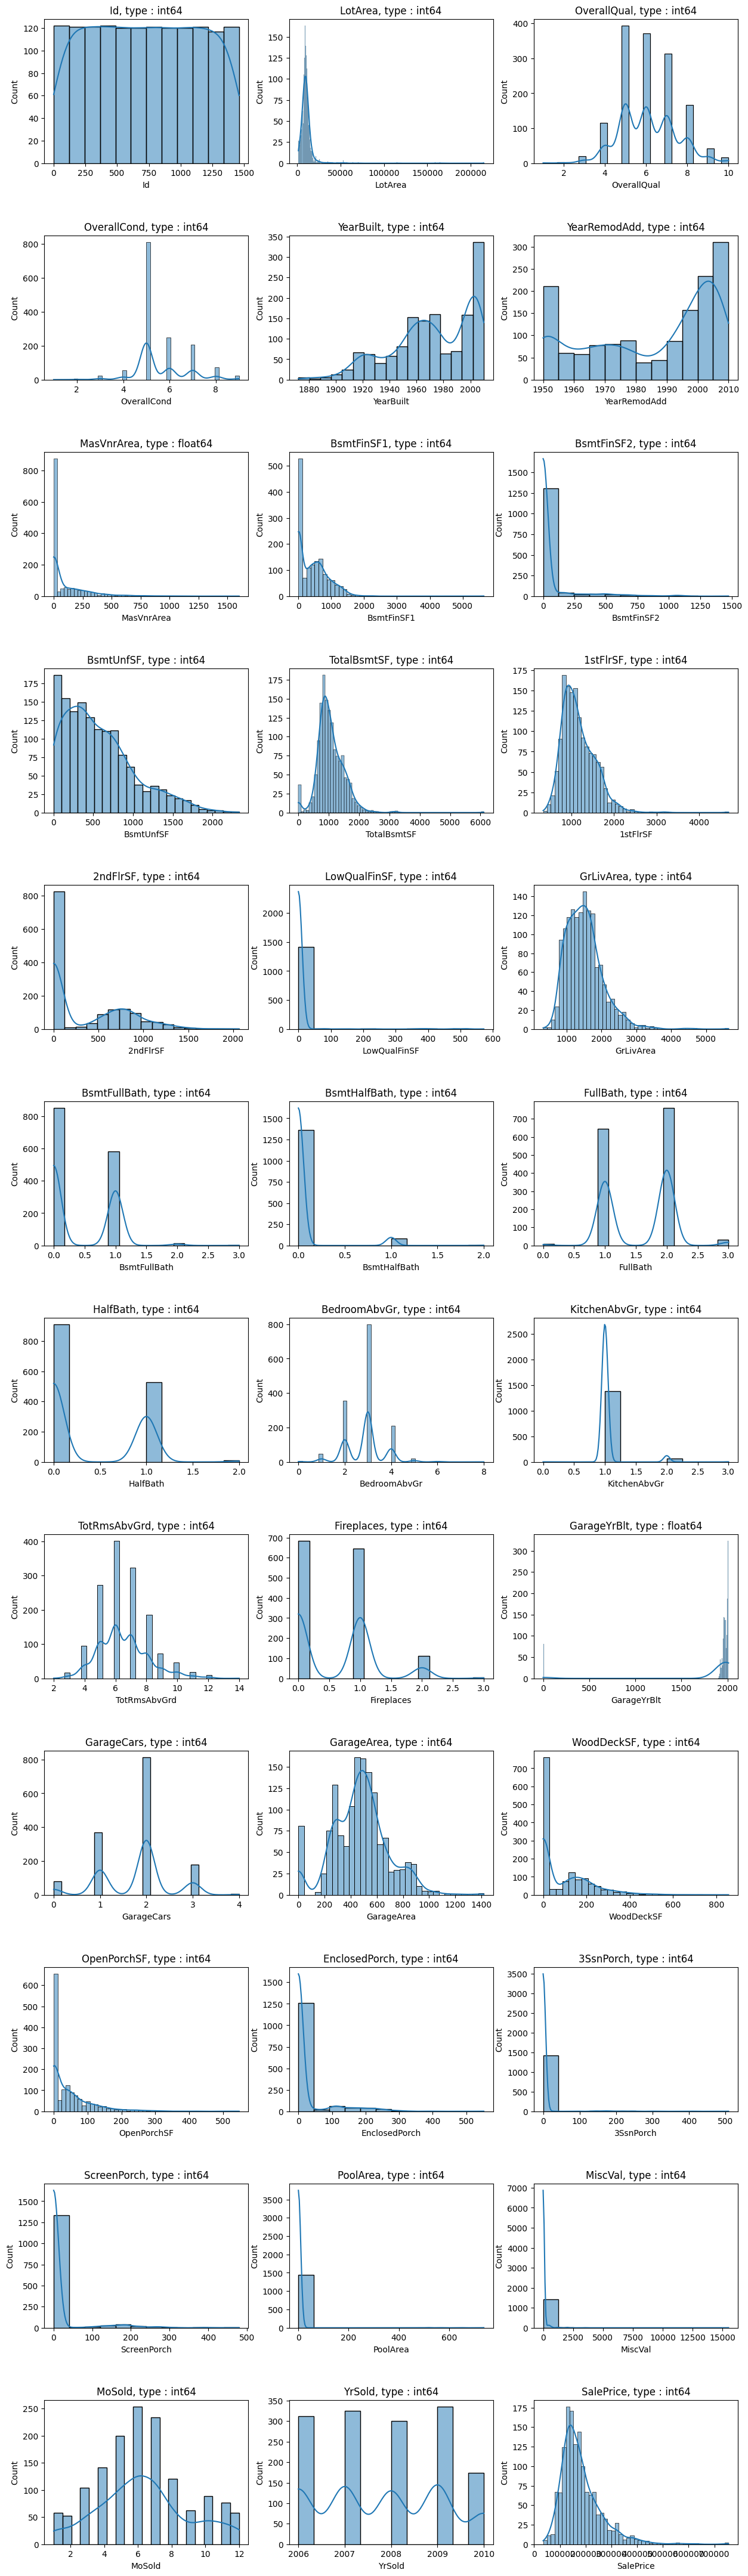

In [ ]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 55))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()
print(len(numerical_cols))
for idx , col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f"{col}, type : {data[col].dtype}")

this is before transformation

### Adding Feature


before we transform skewed distribution to normal distribution, first we can make new column from feature that already exist

<Axes: xlabel='HouseAge', ylabel='Count'>

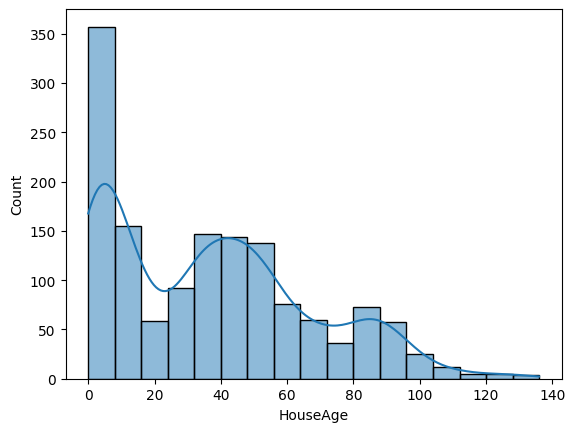

In [ ]:
#HouseAge
data["HouseAge"] = data["YrSold"] - data["YearBuilt"]
sns.histplot(data=data, x="HouseAge", kde=True)

In [ ]:
data["HasGarage"] = data["GarageType"].apply(lambda x: 1 if x != "None" else 0)

In [ ]:
data["HasBsmt"] = data["BsmtQual"].apply(lambda x: 1 if x != "None" else 0)

In [ ]:
categorical_cols.append("HasGarage")
categorical_cols.append("HasBsmt")
numerical_cols.append("HouseAge")

### Outlier handling

37


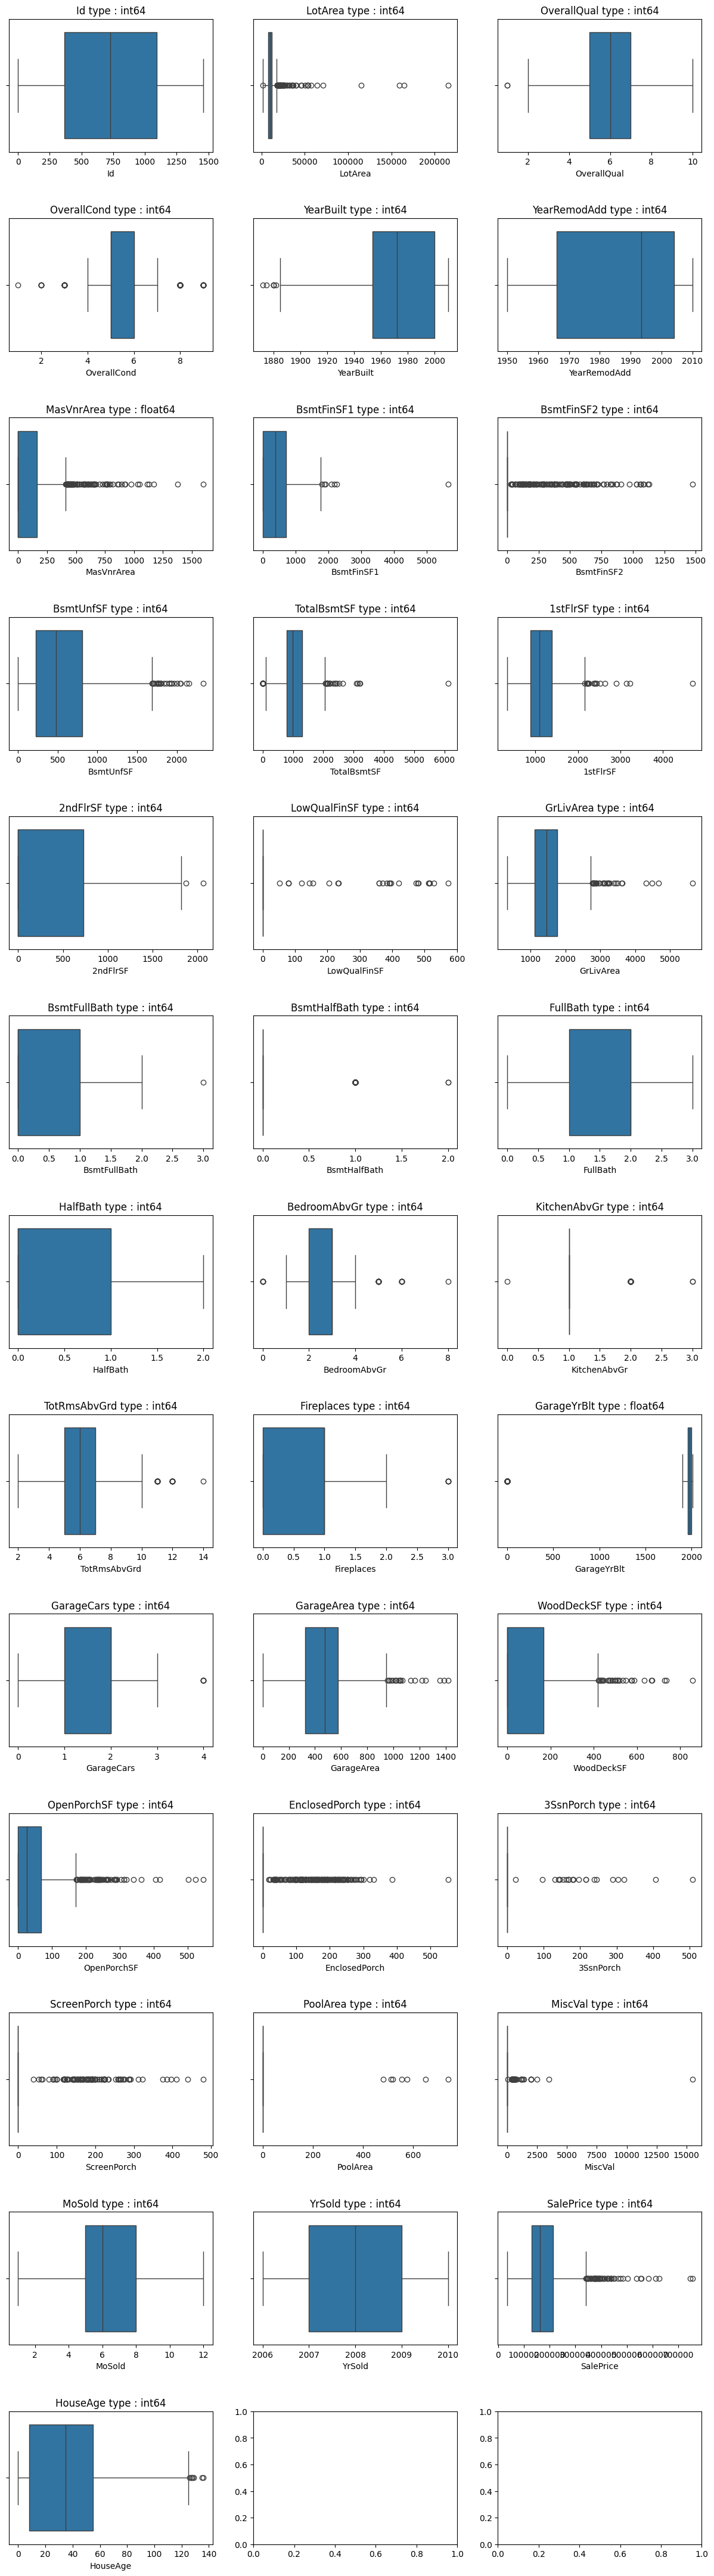

In [ ]:
fig, axes = plt.subplots(ncols = 3, nrows = 13, figsize=(15, 55))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()
print(len(numerical_cols))
for idx , col in enumerate(numerical_cols):
    sns.boxplot(data=data, x=col, ax=axes[idx])
    axes[idx].set_title(f"{col} type : {data[col].dtype}")

In [ ]:
def outlier_info(data, column):
   Q1 = data[column].quantile(0.25)
   Q3 = data[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
   outliers_percentage = round(outliers / len(data) * 100, 2)
   return {
       "Q1" : Q1
       , "Q3" : Q3
       , "IQR" : IQR
       , "lower_bound" : lower_bound
       , "upper_bound" : upper_bound
       , "outliers" : outliers
       , "outliers_percentage" : outliers_percentage
   }


Our technique for handling outlier is just to remove the extreme outlier, therefore we're not removing vast amount of data to handling outlier

After analyzing what column must had outlier handling, these are the column , [
    "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF",
    "1stFlrSF", "GrLivArea", "TotRmsAbvGrd", "MiscVal",
    "ScreenPorch", "PoolArea", "3SsnPorch", "OpenPorchSF", "EnclosedPorch", "WoodDeckSF"
]

In [ ]:
total_removal_outlier = 0

In [ ]:
#LotArea
extreme_outlier_lot_area = len(data[data["LotArea"] >= 100_000])
total_removal_outlier += extreme_outlier_lot_area
print(extreme_outlier_lot_area)
data = data[data["LotArea"] < 100_000]

4


In [ ]:
#MasVnrArea
extreme_outlier_mas_vnr_area = len(data[data["MasVnrArea"] >= 1250])
total_removal_outlier += extreme_outlier_mas_vnr_area
print(extreme_outlier_mas_vnr_area)
data = data[data["MasVnrArea"] < 1250]

2


In [ ]:
#BsmtFinSF1
extreme_outlier_BsmtFinSF1 = len(data[data["BsmtFinSF1"] >= 4000])
total_removal_outlier += extreme_outlier_BsmtFinSF1
print(extreme_outlier_BsmtFinSF1)
data = data[data["BsmtFinSF1"] < 4000]

1


In [ ]:
#TotalBsmtSF
extreme_outlier_total_bsmt_sf = len(data[data["TotalBsmtSF"] >= 3000])
total_removal_outlier += extreme_outlier_total_bsmt_sf
print(extreme_outlier_total_bsmt_sf)
data = data[data["TotalBsmtSF"] < 3000]

4


In [ ]:
#1stFlrSF
extreme_outlier_1st_flr_sf = len(data[data["1stFlrSF"] > 3000])
total_removal_outlier += extreme_outlier_1st_flr_sf
print(extreme_outlier_1st_flr_sf)

0


In [ ]:
#GrLivArea
extreme_outlier_gr_liv_area = len(data[data["GrLivArea"] > 4000])
total_removal_outlier += extreme_outlier_gr_liv_area
print(len(data[data["GrLivArea"] > 4000]))
data = data[data["GrLivArea"] <= 4000]

2


In [ ]:
#TotRmsAbvGrd
outlier_rms_grd = len(data[data["TotRmsAbvGrd"] > 12])
total_removal_outlier += outlier_rms_grd
print(outlier_rms_grd)
data = data[data["TotRmsAbvGrd"] <= 12]

1


In [ ]:
#OpenPorchSF
outlier_open_porch_sf = len(data[data["OpenPorchSF"] >= 400])
total_removal_outlier += outlier_open_porch_sf
print(outlier_open_porch_sf)
data = data[data["OpenPorchSF"] < 400]

4


In [ ]:
outlier_wood_deck_sf = len(data[data["WoodDeckSF"] >= 600])
total_removal_outlier += outlier_wood_deck_sf
print(outlier_wood_deck_sf)
data = data[data["WoodDeckSF"] < 600]

5


For columns that have many 0 values, we have to check the boxplot of the data excluding the 0 values.

<Axes: xlabel='BsmtFinSF2'>

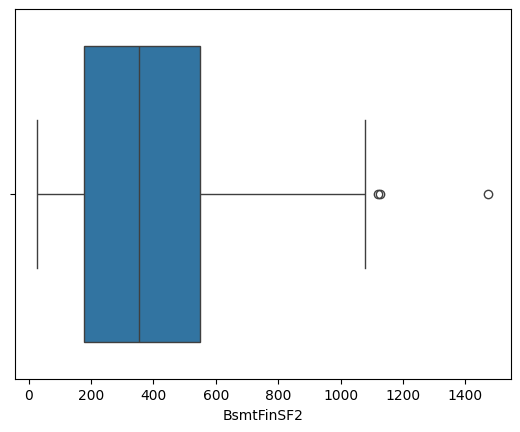

In [ ]:
#BsmtFinSF2
BsmtFinSF2 = data[data["BsmtFinSF2"] != 0]
sns.boxplot(data=BsmtFinSF2, x="BsmtFinSF2")

In [ ]:
info_BsmtFinSF2 = outlier_info(BsmtFinSF2, "BsmtFinSF2")
print(f"{info_BsmtFinSF2['upper_bound']}")
count_extreme_outlier = len(data[data["BsmtFinSF2"] > info_BsmtFinSF2['upper_bound']])
total_removal_outlier += count_extreme_outlier
print(count_extreme_outlier)
data = data[data["BsmtFinSF2"] <= info_BsmtFinSF2['upper_bound']]

1112.75
3


<Axes: xlabel='MiscVal'>

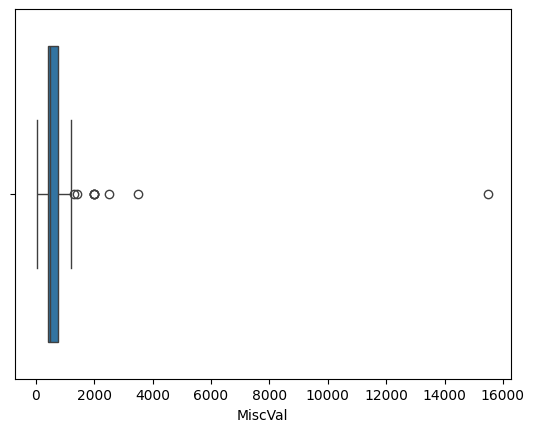

In [ ]:
#MiscVal
MiscVal = data[data["MiscVal"] != 0]
sns.boxplot(data=MiscVal, x="MiscVal")

In [ ]:
info_misc_val = outlier_info(MiscVal, "MiscVal")
print(f"{info_misc_val['upper_bound']}")
count_extreme_outlier_misc_val = len(data[data["MiscVal"] > info_misc_val['upper_bound']])
total_removal_outlier += count_extreme_outlier_misc_val
print(count_extreme_outlier_misc_val)
data = data[data["MiscVal"] <= info_misc_val['upper_bound']]

1237.5
9


<Axes: xlabel='PoolArea'>

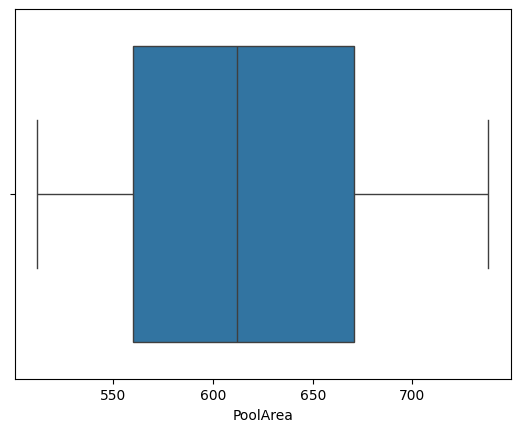

In [ ]:
PoolArea = data[data["PoolArea"] != 0]
sns.boxplot(data=PoolArea, x="PoolArea")

nothing to remove on pool

<Axes: xlabel='ScreenPorch'>

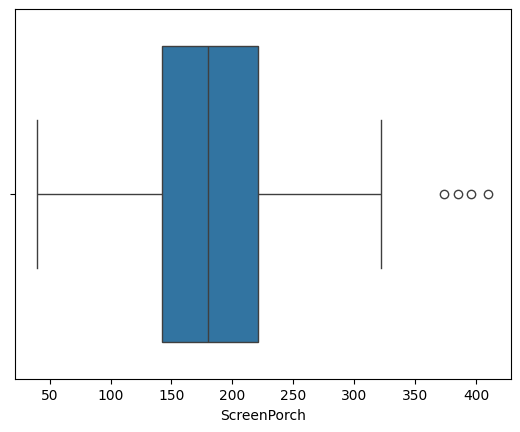

In [ ]:
#ScreenPorch
ScreenPorch = data[data["ScreenPorch"] != 0]
sns.boxplot(data=ScreenPorch, x="ScreenPorch")

In [ ]:
info_screen_porch = outlier_info(ScreenPorch, "ScreenPorch")
print(f"{info_screen_porch['upper_bound']}")
count_extreme_outlier_screen_porch = len(data[data["ScreenPorch"] > info_screen_porch['upper_bound']])
total_removal_outlier += count_extreme_outlier_screen_porch
print(count_extreme_outlier_screen_porch)
data = data[data["ScreenPorch"] <= info_screen_porch['upper_bound']]

338.75
4


<Axes: xlabel='3SsnPorch'>

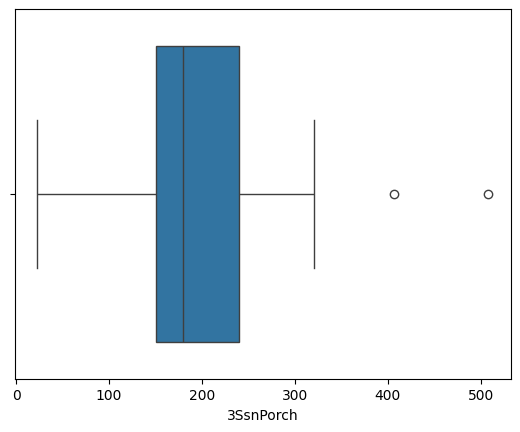

In [ ]:
#3SsnPorch
SsnPorch = data[data["3SsnPorch"] != 0]
sns.boxplot(data=SsnPorch, x="3SsnPorch")

In [ ]:
info_ssn_porch = outlier_info(SsnPorch, "3SsnPorch")
print(f"{info_ssn_porch['upper_bound']}")
count_extreme_outlier_ssn_porch = len(data[data["3SsnPorch"] > info_ssn_porch['upper_bound']])
total_removal_outlier += count_extreme_outlier_ssn_porch
print(count_extreme_outlier_ssn_porch)
data = data[data["3SsnPorch"] <= info_ssn_porch['upper_bound']]


373.25
2


<Axes: xlabel='EnclosedPorch'>

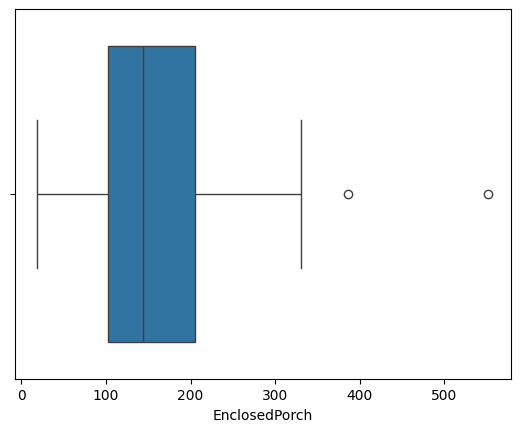

In [ ]:
#EnclosedPorch
EnclosedPorch = data[data["EnclosedPorch"] != 0]
sns.boxplot(data=EnclosedPorch, x="EnclosedPorch")

In [ ]:
info_enclosed_porch = outlier_info(EnclosedPorch, "EnclosedPorch")
print(f"{info_enclosed_porch['upper_bound']}")
count_extreme_outlier_enclosed_porch = len(data[data["EnclosedPorch"] > info_enclosed_porch['upper_bound']])
total_removal_outlier += count_extreme_outlier_enclosed_porch
print(count_extreme_outlier_enclosed_porch)
data = data[data["EnclosedPorch"] <= info_enclosed_porch['upper_bound']]

359.5
2


In [ ]:
total_removal_outlier

43

In [ ]:
print(f"Percentage removal outlier from raw data : {round(total_removal_outlier / length_data * 100, 2)}%")

Percentage removal outlier from raw data : 2.95%


boxplot after outlier handling

37


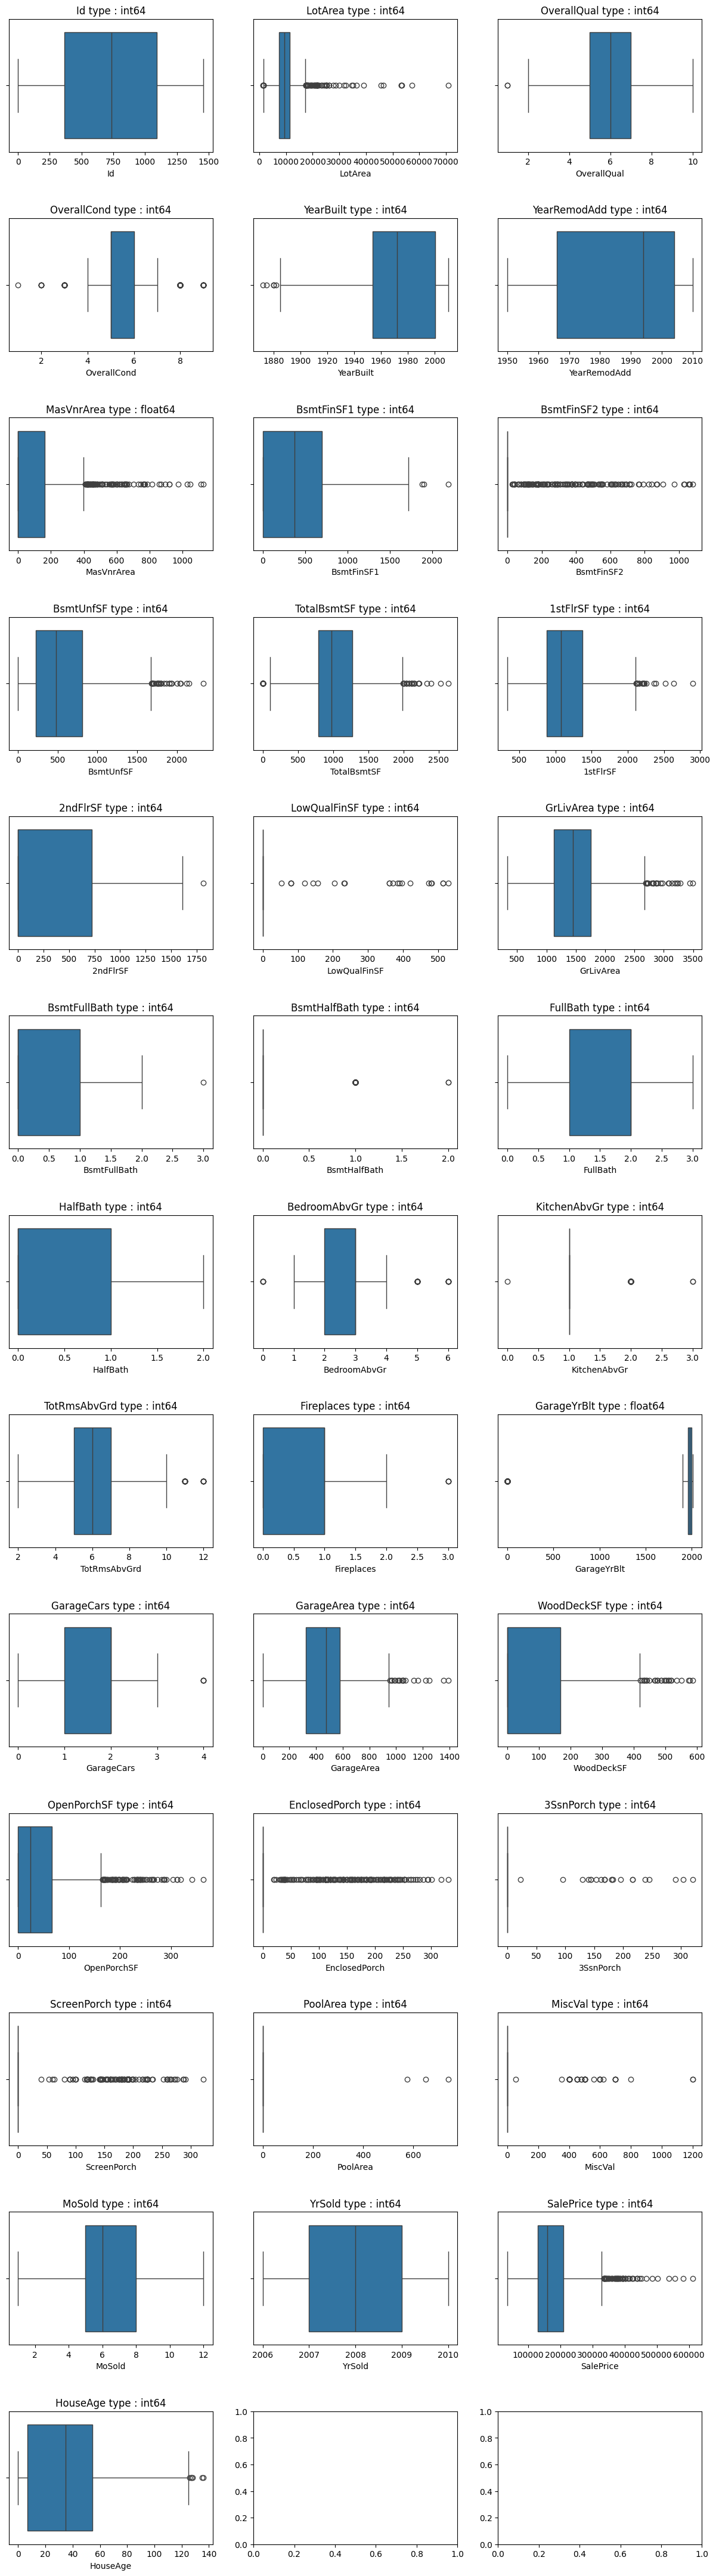

In [ ]:
fig, axes = plt.subplots(ncols = 3, nrows = 13, figsize=(15, 55))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()
print(len(numerical_cols))
for idx , col in enumerate(numerical_cols):
    sns.boxplot(data=data, x=col, ax=axes[idx])
    axes[idx].set_title(f"{col} type : {data[col].dtype}")

In [ ]:
data_for_other_question = data.copy()

### Distribution transformation

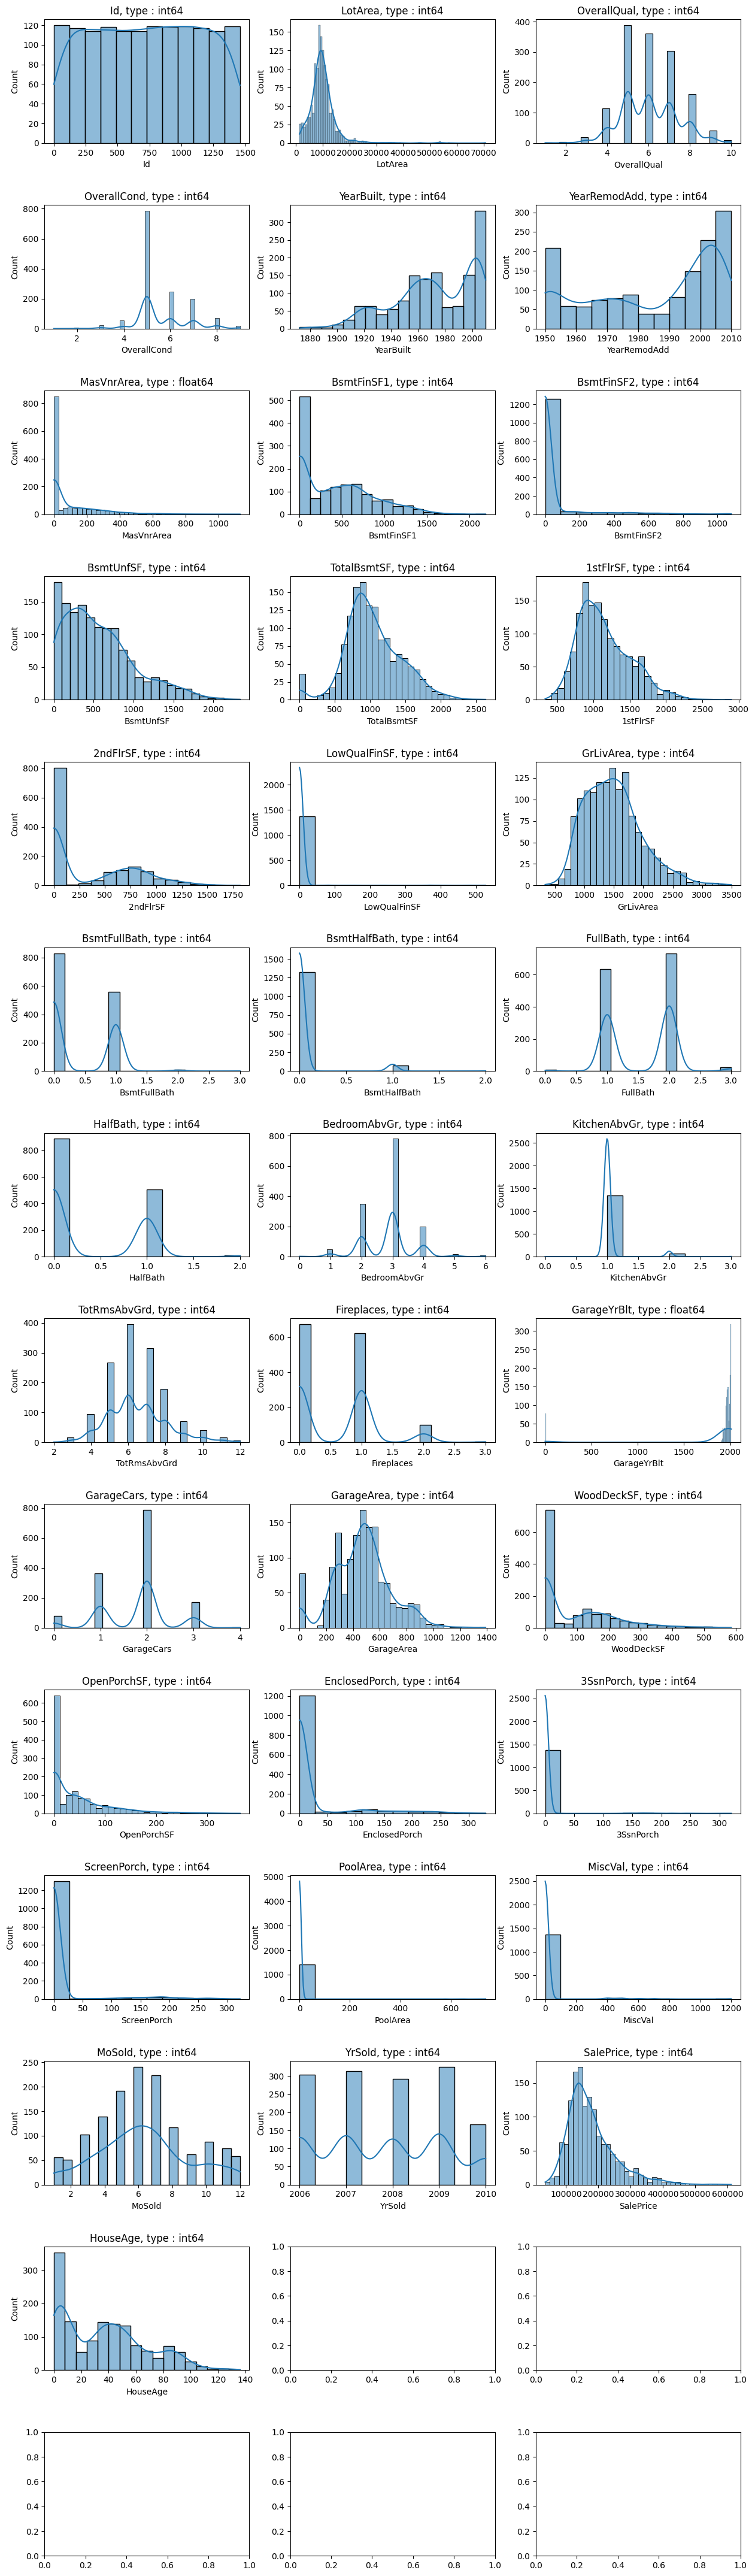

In [ ]:
fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(15, 55))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for idx , col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f"{col}, type : {data[col].dtype}")

In [ ]:
data.describe()

Id   MSSubClass       LotArea  OverallQual  OverallCond  \
count  1403.000000  1403.000000   1403.000000   1403.00000  1403.000000   
mean    729.921597    56.817534   9923.239487      6.06201     5.576622   
std     422.081581    42.186287   5256.414649      1.35592     1.109071   
min       1.000000    20.000000   1300.000000      1.00000     1.000000   
25%     365.500000    20.000000   7500.000000      5.00000     5.000000   
50%     734.000000    50.000000   9375.000000      6.00000     5.000000   
75%    1093.500000    70.000000  11439.000000      7.00000     6.000000   
max    1459.000000   190.000000  70761.000000     10.00000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1403.000000   1403.000000  1403.000000  1403.000000  1403.000000   
mean   1971.231646   1984.703493   100.001426   429.513186    42.649323   
std      30.103953     20.753747   170.103614   424.986819   148.883672   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1994.000000     0.000000   375.000000     0.000000   
75%    2000.500000   2004.000000   161.500000   699.500000     0.000000   
max    2010.000000   2010.000000  1129.000000  2188.000000  1080.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1403.000000  1403.000000  1403.000000  1403.000000   1403.000000   
mean    566.798289  1038.960798  1148.493942   336.315039      5.027798   
std     440.520437   398.721363   361.210752   423.702408     44.027824   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     224.000000   793.000000   876.500000     0.000000      0.000000   
50%     481.000000   980.000000  1078.000000     0.000000      0.000000   
75%     805.000000  1272.500000  1371.000000   720.000000      0.000000   
max    2336.000000  2633.000000  2898.000000  1818.000000    528.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1403.000000   1403.000000   1403.000000  1403.000000  1403.000000   
mean   1489.836778      0.416964      0.057021     1.553100     0.375624   
std     479.216565      0.513079      0.238035     0.542616     0.498962   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1124.500000      0.000000      0.000000     1.000000     0.000000   
50%    1456.000000      0.000000      0.000000     2.000000     0.000000   
75%    1752.000000      1.000000      0.000000     2.000000     1.000000   
max    3493.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1403.000000   1403.000000   1403.000000  1403.000000  1403.000000   
mean       2.853172      1.045617      6.472559     0.597292  1868.368496   
std        0.795742      0.218738      1.576778     0.633959   454.117176   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000  1958.000000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        6.000000      3.000000     12.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1403.000000  1403.000000  1403.000000  1403.000000    1403.000000   
mean      1.757662   469.377049    91.813257    44.816821      21.531005   
std       0.745699   211.858042   118.915580    60.925178      58.916073   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   324.500000     0.000000     0.000000       0.000000   
50%       2.000000   475.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   168.000000    66.000000       0.000000   
m

we don't transformation cols that already normal, and had many 0 values init

In [ ]:
pt = PowerTransformer(method='yeo-johnson')

transformation_cols = ["LotArea", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea"]
data[transformation_cols] = pt.fit_transform(data[transformation_cols])

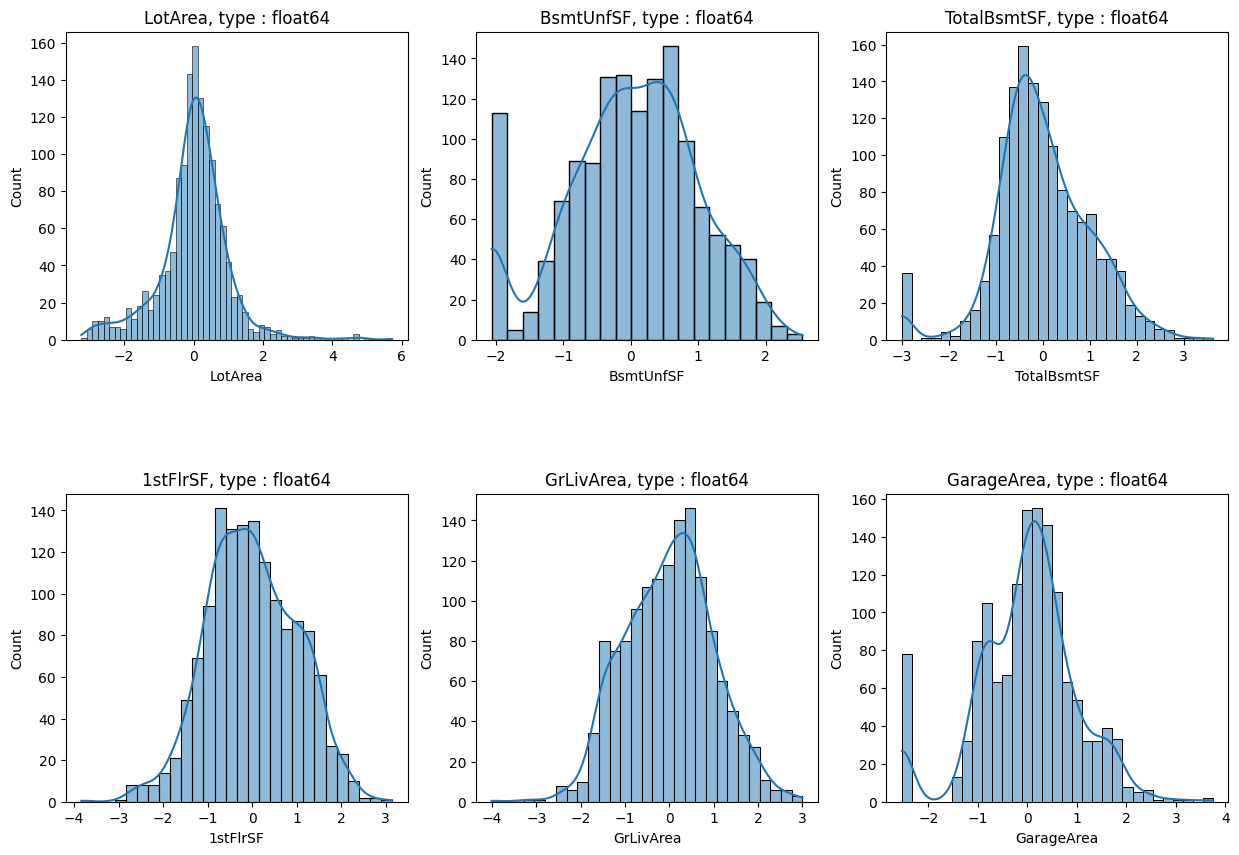

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for idx , col in enumerate(transformation_cols):
    sns.histplot(data=data, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f"{col}, type : {data[col].dtype}")

### Encoding categorical

In [ ]:
print(categorical_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'HasGarage', 'HasBsmt']


In [ ]:
data[[col for col in categorical_cols if col not in ['MSSubClass', 'HasGarage', 'HasBsmt']]].describe()


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1403   1403     1403        1403      1403      1403      1403   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1107   1398      896        1263      1402      1015      1330   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1403       1403       1403     1403       1403      1403   
unique           25          9          6        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            217       1214       1391     1171        702      1103   

       RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation  \
count      1403        1403        1403      1403      1403       1403   
unique        7          15          16         4         5          6   
top     CompShg     VinylSd     VinylSd        TA        TA      PConc   
freq       1381         497         487       887      1234        619   

       BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      1403     1403         1403         1403         1403    1403   
unique        5        5            5            7            7       6   
top          TA       TA           No          Unf          Unf    GasA   
freq        628     1259          919          419         1213    1374   

       HeatingQC CentralAir Electrical KitchenQual Functional GarageType  \
count       1403       1403       1403        1403       1403       1403   
unique         5          2          5           4          7          7   
top           Ex          Y      SBrkr          TA        Typ     Attchd   
freq         706       1311       1281         715       1312        829   

       GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
count          1403       1403       1403       1403     1403          1403  
unique            4          6          6          3        9             6  
top             Unf         TA         TA          Y       WD        Normal  
freq            593       1260       1272       1288     1216          1152

In [ ]:
for i in categorical_cols:
    print(f"{i} : {data[i].nunique()}")
    print(f"{i} : {data[i].unique()}")

MSZoning : 5
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : 2
Street : ['Pave' 'Grvl']
LotShape : 4
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : 4
LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities : 2
Utilities : ['AllPub' 'NoSeWa']
LotConfig : 5
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : 3
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : 25
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : 9
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 6
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'RRAn']
BldgType : 5
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : 8
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : 6
RoofStyle 

first, we have to know which column is ordinal or nominal category

after analyzing, here's the nominal and ordinal category

In [ ]:
# List of ordinal features (in clear order)
ordinal_features = [
    'LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual',
    'GarageQual', 'GarageCond', 'PavedDrive', 'BsmtFinType1',
    'Electrical', 'Functional', 'GarageFinish'
]
# List of nominal features (in no clear order)
nominal_features = [
    'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
    'Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl','Exterior1st', 'Exterior2nd', 'Foundation' ,
    'Heating','GarageType', 'SaleType','SaleCondition'
]
yes_no = ['CentralAir' , 'HasGarage', 'HasBsmt']

encoding ordinal data

In [ ]:
#Mapping quality feature
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, "None" : 0}
qual_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',  'GarageQual', 'GarageCond']
for feature in qual_features:
    data[feature] = data[feature].map(quality_mapping)

# Mapping other ordinal feature
data['LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['Utilities'] = data['Utilities'].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0})
data['LandSlope'] = data['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'None': 1})
bsmt_fin_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, "None" : 0}
data['BsmtFinType1'] = data['BsmtFinType1'].map(bsmt_fin_mapping)
data['BsmtFinType2'] = data['BsmtFinType2'].map(bsmt_fin_mapping)
data['Electrical'] = data['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
data['Functional'] = data['Functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1})
data['PavedDrive'] = data['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0})
data["CentralAir"] = data["CentralAir"].map({"N" : 0 , "Y" : 1})

In [ ]:
data.head()

Id  MSSubClass MSZoning   LotArea Street  LotShape LandContour  Utilities  \
0   1          60       RL -0.167134   Pave         3         Lvl          3   
1   2          20       RL  0.101810   Pave         3         Lvl          3   
2   3          60       RL  0.448864   Pave         2         Lvl          3   
3   4          70       RL  0.090626   Pave         2         Lvl          3   
4   5          60       RL  0.995242   Pave         2         Lvl          3   

  LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside          2      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2          2      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside          2      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner          2      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2          2      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd  MasVnrArea  ExterQual  ExterCond Foundation  \
0     VinylSd     VinylSd       196.0          4          3      PConc   
1     MetalSd     MetalSd         0.0          3          3     CBlock   
2     VinylSd     VinylSd       162.0          4          3      PConc   
3     Wd Sdng     Wd Shng         0.0          3          3     BrkTil   
4     VinylSd     VinylSd       350.0          4          3      PConc   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         4         3           NaN             6         706             1   
1         4         3           4.0             5         978             1   
2         4         3           2.0             6         486             1   
3         3         4           NaN             5         216             1   
4         4         3           3.0             6         655             1   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir  \
0           0  -0.891310    -0.418983    GasA          5           1   
1           0  -0.437071     0.574225    GasA          5           1   
2           0  -0.049565    -0.258043    GasA          5           1   
3           0   0.182686    -0.674472    GasA          4           1   
4           0   0.076445     0.294217    GasA          5           1   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           4 -0.795311       854             0   0.569411             1   
1           4  0.458999         0             0  -0.380422             0   
2           4 -0.562322       866             0   0.709365             1   
3           4 -0.421435       756             0   0.582516             1   
4           4  0.144633      1053             0   1.391625             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            4   
1             1         2         0             3             1            3   
2             0         2         1             3             1            4   
3             0         1         0             3             1            4   
4             0         2         1             4             1            4   

   TotRmsAbvGrd  Functional  Fireplaces GarageType  GarageYrBlt  GarageFinish  \
0             8           7           0     Attchd       2003.0           2.0   
1             6           7           1     Attchd       1976.0           2.0   
2             6           7           1     Attchd

Nominal Feature

In [ ]:
data = pd.get_dummies(data, columns=nominal_features, drop_first = True)

In [ ]:
data.head()

Id  MSSubClass   LotArea  LotShape  Utilities  LandSlope  OverallQual  \
0   1          60 -0.167134         3          3          2            7   
1   2          20  0.101810         3          3          2            6   
2   3          60  0.448864         2          3          2            7   
3   4          70  0.090626         2          3          2            7   
4   5          60  0.995242         2          3          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
0            5       2003          2003       196.0          4          3   
1            8       1976          1976         0.0          3          3   
2            5       2001          2002       162.0          4          3   
3            5       1915          1970         0.0          3          3   
4            5       2000          2000       350.0          4          3   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         4         3           NaN             6         706             1   
1         4         3           4.0             5         978             1   
2         4         3           2.0             6         486             1   
3         3         4           NaN             5         216             1   
4         4         3           3.0             6         655             1   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  \
0           0  -0.891310    -0.418983          5           1           4   
1           0  -0.437071     0.574225          5           1           4   
2           0  -0.049565    -0.258043          5           1           4   
3           0   0.182686    -0.674472          4           1           4   
4           0   0.076445     0.294217          5           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.795311       854             0   0.569411             1             0   
1  0.458999         0             0  -0.380422             0             1   
2 -0.562322       866             0   0.709365             1             0   
3 -0.421435       756             0   0.582516             1             0   
4  0.144633      1053             0   1.391625             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            4             8   
1         2         0             3             1            3             6   
2         2         1             3             1            4             6   
3         1         0             3             1            4             7   
4         2         1             4             1            4             9   

   Functional  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           7           0       2003.0           2.0           2    0.402109   
1           7           1       1976.0           2.0           2    0.010450   
2           7           1       2001.0           2.0           2    0.662388   
3           7           1       1998.0           1.0           3    0.807740   
4           7           1       2000.0           2.0           3    1.612153   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           3           3           2           0           61              0   
1           3           3           2         298            0              0   
2           3           3           2           0           42              0   
3           3           3           2           0           35            272   
4           3           3           2         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0          0            0         0        0       2    2008     208500   
1          0            0         0        0       5    2007     181500   
2       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1403 entries, 0 to 1458
Columns: 188 entries, Id to SaleCondition_Partial
dtypes: bool(129), float64(10), int64(49)
memory usage: 834.4 KB


### Numerical Scalling

In [ ]:
numerical_cols

['Id',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HouseAge']

In [ ]:
no_need_scalling = [col for col in numerical_cols if data[col].nunique() < 15] + ["Id" , "MS"]
numerical_scalling = [col for col in numerical_cols if col not in no_need_scalling]
sc = StandardScaler()
data[numerical_scalling] = sc.fit_transform(data[numerical_scalling])

In [ ]:
numerical_scalling

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'SalePrice',
 'HouseAge']

In [ ]:
data.describe()

Id   MSSubClass       LotArea     LotShape    Utilities  \
count  1403.000000  1403.000000  1.403000e+03  1403.000000  1403.000000   
mean    729.921597    56.817534 -2.152392e-17     2.600143     2.998574   
std     422.081581    42.186287  1.000357e+00     0.573226     0.053395   
min       1.000000    20.000000 -3.235105e+00     0.000000     1.000000   
25%     365.500000    20.000000 -4.105304e-01     2.000000     3.000000   
50%     734.000000    50.000000  5.113961e-02     3.000000     3.000000   
75%    1093.500000    70.000000  4.861614e-01     3.000000     3.000000   
max    1459.000000   190.000000  5.723183e+00     3.000000     3.000000   

         LandSlope  OverallQual  OverallCond     YearBuilt  YearRemodAdd  \
count  1403.000000   1403.00000  1403.000000  1.403000e+03  1.403000e+03   
mean      1.941554      6.06201     5.576622  3.481811e-16 -4.570669e-15   
std       0.260592      1.35592     1.109071  1.000357e+00  1.000357e+00   
min       0.000000      1.00000     1.000000 -3.297475e+00 -1.672752e+00   
25%       2.000000      5.00000     5.000000 -5.726089e-01 -9.015317e-01   
50%       2.000000      6.00000     5.000000  2.553244e-02  4.481033e-01   
75%       2.000000      7.00000     6.000000  9.725895e-01  9.301158e-01   
max       2.000000     10.00000     9.000000  1.288275e+00  1.219323e+00   

         MasVnrArea    ExterQual    ExterCond     BsmtQual     BsmtCond  \
count  1.403000e+03  1403.000000  1403.000000  1403.000000  1403.000000   
mean   3.291894e-17     3.382751     3.081254     3.479686     2.934426   
std    1.000357e+00     0.563679     0.346921     0.876126     0.555075   
min   -5.880950e-01     2.000000     1.000000     0.000000     0.000000   
25%   -5.880950e-01     3.000000     3.000000     3.000000     3.000000   
50%   -5.880950e-01     3.000000     3.000000     4.000000     3.000000   
75%    3.616649e-01     4.000000     3.000000     4.000000     3.000000   
max    6.051403e+00     5.000000     5.000000     5.000000     4.000000   

       BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2    BsmtFinSF2  \
count    484.000000   1403.000000  1.403000e+03   1403.000000  1.403000e+03   
mean       2.871901      3.527441 -6.837011e-17      1.237349  5.634204e-17   
std        0.875309      2.108284  1.000357e+00      0.876041  1.000357e+00   
min        1.000000      0.000000 -1.011011e+00      0.000000 -2.865629e-01   
25%        2.000000      1.000000 -1.011011e+00      1.000000 -2.865629e-01   
50%        3.000000      4.000000 -1.283160e-01      1.000000 -2.865629e-01   
75%        3.250000      6.000000  6.355093e-01      1.000000 -2.865629e-01   
max        4.000000      6.000000  4.139220e+00      6.000000  6.970009e+00   

          BsmtUnfSF   TotalBsmtSF    HeatingQC   CentralAir   Electrical  \
count  1.403000e+03  1.403000e+03  1403.000000  1403.000000  1403.000000   
mean  -3.038672e-17  2.532226e-18     4.135424     0.934426     3.887384   
std    1.000357e+00  1.000357e+00     0.962295     0.247624     0.399899   
min   -2.067093e+00 -3.000284e+00     1.000000     0.000000     0.000000   
25%   -6.222257e-01 -5.793353e-01     3.000000     1.000000     4.000000   
50%    5.672419e-02 -1.088137e-01     5.000000     1.000000     4.000000   
75%    6.744198e-01  5.991414e-01     5.000000     1.000000     4.000000   
max    2.546981e+00  3.619969e+00     5.000000     1.000000     4.000000   

           1stFlrSF      2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  \
count  1.403000e+03  1.403000e+03  1.403000e+03  1.403000e+03   1403.000000   
mean  -1.012891e-17 -8.609570e-17  2.025781e-17  2.342309e-17      0.416964   
std    1.000357e+00  1.000357e+00  1.000357e+00  1.000357e+00      0.513079   
min   -3.835709e+00 -7.940360e-01 -1.142366e-01 -4.011369e+00      0.000000   
25%   -7.188378e-01 -7.940360e-01 -1.142366e-01 -7.286249e-01      0.000000   
50%   -5.020011e-02 -7.940360e-01 -1.142366e-01  6.064466e-02      0.000000   
75%    7.266653e-01  9.058758

# 2. After performing feature engineering, follow these recommendations:
- Create 5 analysis questions 
- Answer them using data manipulation methods (sorting, filtering, group by, pivot, melt, crosstab, working with datetime, etc.) (adjust according to your needs)
- Create graphic visualizations to facilitate insight extraction after answering using the data manipulation methods above
- Write down your insights

In [ ]:
data_visualization = data_for_other_question.copy()

#### What top 10 neighborhood has the highest SalesPrice mean?

In [ ]:
data_neighborhood = data_visualization.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).head(10)
data_neighborhood

Neighborhood
StoneBr    314603.125000
NridgHt    311470.783784
NoRidge    302255.428571
Timber     240970.085714
Somerst    226290.439024
Veenker    224150.000000
Crawfor    209688.510204
ClearCr    206647.384615
CollgCr    197201.797297
Blmngtn    194870.882353
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Neighborhood')

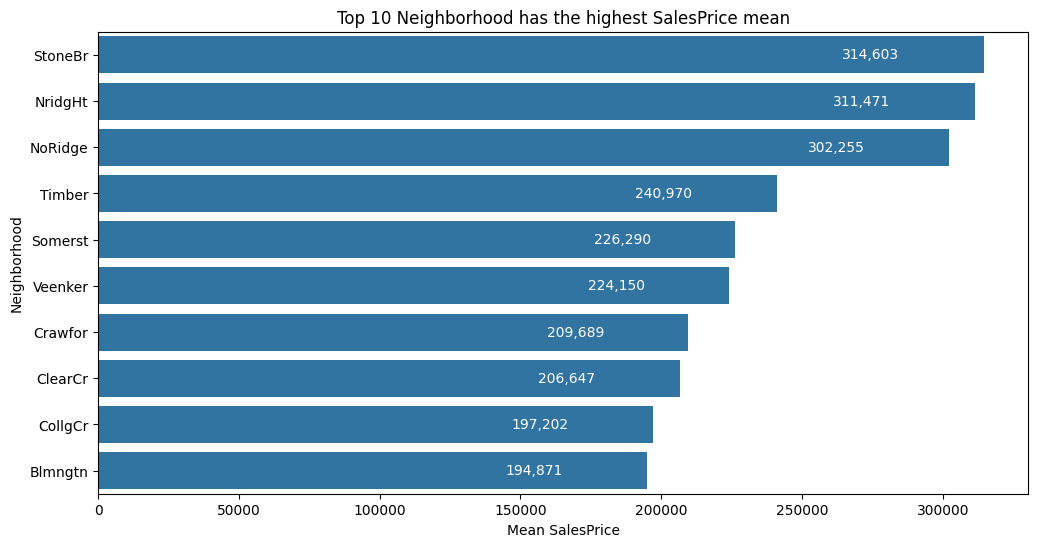

In [ ]:
fig, ax = plt.subplots(figsize=(12,6 ))
sns.barplot(y=data_neighborhood.index, x=data_neighborhood.values, ax=ax)
for i, v in enumerate(data_neighborhood.values):
    ax.text(v - 30000, i, f'{v:,.0f}', va='center', ha='right', color='white', fontsize=10)
plt.title("Top 10 Neighborhood has the highest SalesPrice mean")
plt.xlabel("Mean SalesPrice")
plt.ylabel("Neighborhood")

##### Insight


- StoneBr has the highest average price (~$314K).
- The top three neighborhoods (StoneBr, NridgeHt, NoRidge) are significantly more expensive than the others.

#### How much does house cost month by month?

In [ ]:
data_visualization["SaleDate"] = pd.to_datetime(
    dict(year=data_visualization["YrSold"], month=data_visualization["MoSold"], day=1)
)

In [ ]:
monthly_price = data_visualization.groupby("SaleDate")["SalePrice"].mean().reset_index()

fig = px.line(
    monthly_price,
    x="SaleDate",
    y="SalePrice",
    title="Monthly Trend of Average House Price (by Year and Month Sold)",
    labels={"SaleDate": "Sale Date", "SalePrice": "Average House Price"},
    markers=True
)

fig.update_traces(hovertemplate='Date: %{x|%b %Y}<br>Price: %{y:$,.0f}')
fig.show()

##### Insight

- Average house prices show a sharp upward and downward pattern each year.
- Significant Decline in Early 2007 & Late 2010

#### Is there any correlation between YearBuilt and SalePrice?

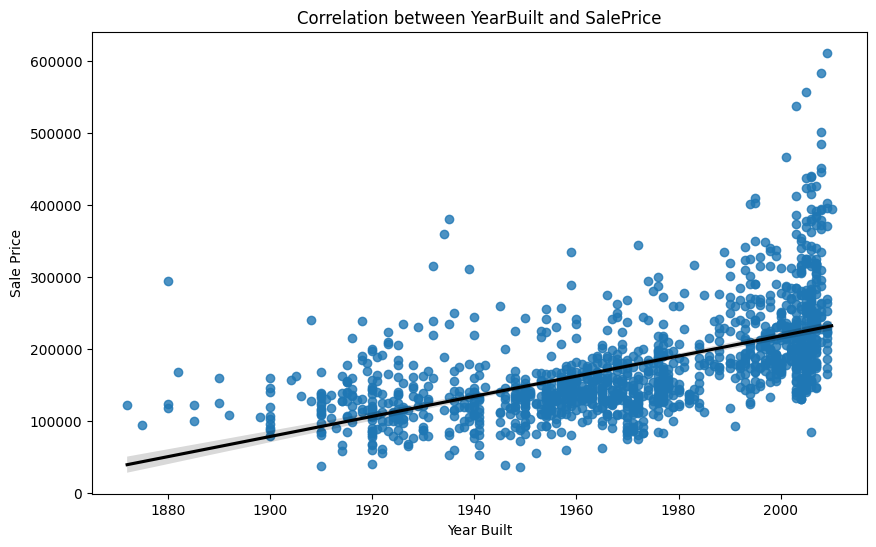

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data_visualization, x="YearBuilt", y="SalePrice", line_kws={"color": "black"})
plt.title("Correlation between YearBuilt and SalePrice")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()

##### Insight

- There is a positive correlation between YearBuilt and SalePrice, which means that newer homes tend to have higher prices.

#### what month has the highest frequency sales by the top 6 highest frequency neighborhood sales?

In [ ]:
data_visualization["MoSold"] = pd.to_datetime(data_visualization["MoSold"], format='%m').dt.month_name()

In [ ]:
data_month = data_visualization.groupby("MoSold")["Id"].count().sort_values(ascending=False)
data_month

MoSold
June         241
July         224
May          192
April        139
August       117
March        102
October       87
November      74
September     62
December      58
January       56
February      51
Name: Id, dtype: int64

In [ ]:
top_neigh = data_visualization['Neighborhood'].value_counts().nlargest(6).index
subset_neigh = data_visualization[data_visualization['Neighborhood'].isin(top_neigh)]

melted = (
    subset_neigh.pivot_table(values='Id', index='Neighborhood', columns='MoSold', aggfunc='count')
    .reset_index()
    .melt(id_vars='Neighborhood', var_name='MoSold', value_name='SalesCount')
    .dropna()
)
print(melted)
melted = (
    melted.sort_values(['Neighborhood', 'SalesCount'], ascending=[True, False])
    .groupby('Neighborhood')
    .apply(lambda x: x.assign(
        MoSold=pd.Categorical(
            x['MoSold'],
            categories=x.sort_values('SalesCount', ascending=False)['MoSold'],
            ordered=True
        )
    ))
    .reset_index(drop=True)
)
print(melted)


   Neighborhood     MoSold  SalesCount
0       CollgCr      April        11.0
1       Edwards      April        18.0
2       Gilbert      April         4.0
3         NAmes      April        22.0
4       OldTown      April        13.0
..          ...        ...         ...
67      Edwards  September         5.0
68      Gilbert  September         2.0
69        NAmes  September         5.0
70      OldTown  September         5.0
71      Somerst  September         3.0

[71 rows x 3 columns]
   Neighborhood     MoSold  SalesCount
0       CollgCr       July        25.0
1       CollgCr        May        22.0
2       CollgCr       June        18.0
3       CollgCr  September        14.0
4       CollgCr     August        13.0
..          ...        ...         ...
66      Somerst   February         4.0
67      Somerst    January         4.0
68      Somerst    October         4.0
69      Somerst  September         3.0
70      Somerst   November         2.0

[71 rows x 3 columns]


/tmp/ipython-input-427485923.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




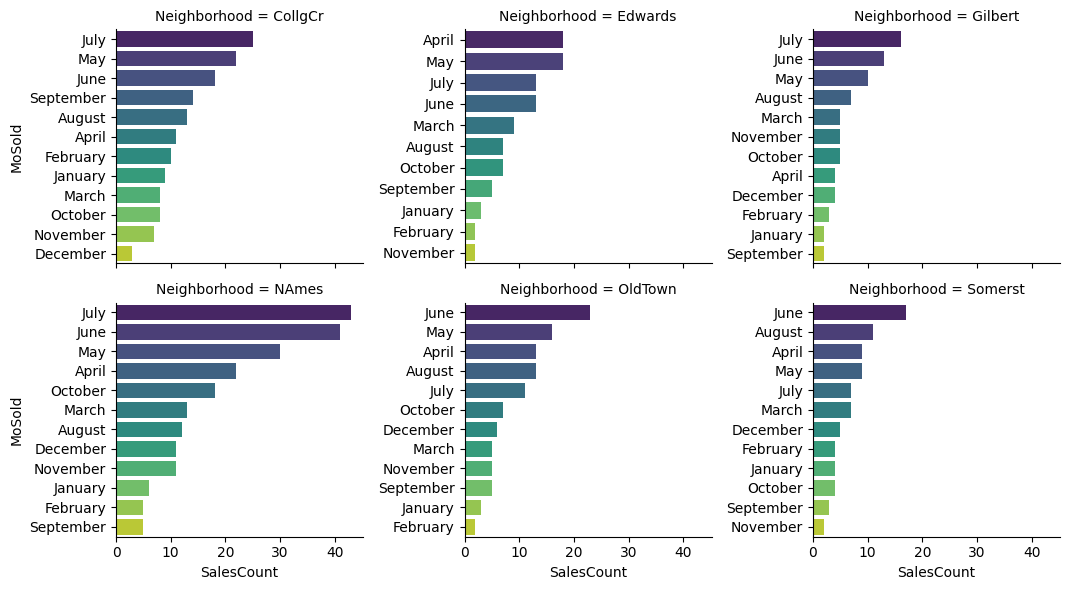

In [ ]:
g = sns.FacetGrid(
    melted,
    col='Neighborhood',
    col_wrap=3,
    height=3,
    aspect=1.2,
    sharey=False
)

g.map_dataframe(
    sns.barplot,
    x='SalesCount',
    y='MoSold',
    palette='viridis',
    legend=False
)

##### Insight

- Highest Sales Month (Consistently): July is the highest sales month in almost all neighborhoods, especially in Colliers, Gilbert, and Names. May and June are also high sales months.

- December, January, and February generally have low sales in almost all neighborhoods. This indicates that winter is not a popular time to buy a home.

- Summer = High Sales Season: Sales tend to increase in the summer (May–August)

#### What house style has the highest price?

In [ ]:
data_housestyle = data_visualization.groupby("HouseStyle")["SalePrice"].mean().sort_values(ascending=False)
data_housestyle

HouseStyle
2Story    206294.652482
2.5Fin    180833.333333
1Story    173842.568376
SLvl      164971.746032
2.5Unf    140590.000000
1.5Fin    140575.189189
SFoyer    135074.486486
1.5Unf    110150.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'HouseStyle')

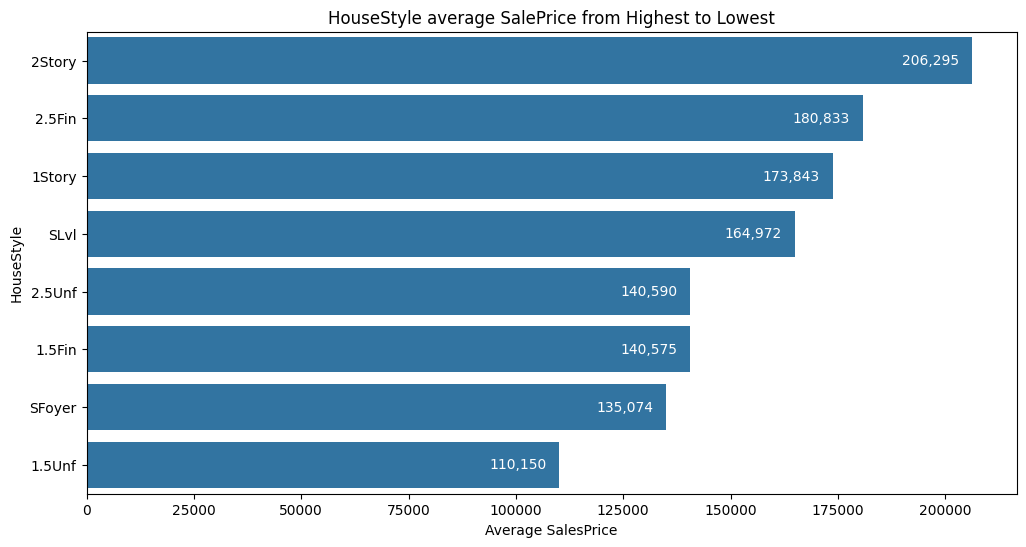

In [ ]:
fig, ax = plt.subplots(figsize=(12,6 ))
sns.barplot(y=data_housestyle.index, x=data_housestyle.values, ax=ax)
for i, v in enumerate(data_housestyle.values):
    ax.text(v - 3000, i, f'{v:,.0f}', va='center', ha='right', color='white', fontsize=10)
plt.title("HouseStyle average SalePrice from Highest to Lowest")
plt.xlabel("Average SalesPrice")
plt.ylabel("HouseStyle")

##### Insight

- 2Story has the highest average selling price of $206,295.

- The difference between the highest and lowest average prices is nearly $100,000, indicating that the architectural style of a home  influences the sale price.

## 3. Perform a multivariate analysis on the numerical columns in the form of:
- Correlation Heatmap + insight / observation 

In [ ]:
data_correlation = data_for_other_question.copy()

In [ ]:
numerical_cols.remove("Id")

In [ ]:
print(numerical_cols)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'HouseAge']


In [ ]:
numerical_correlation = numerical_cols
len(numerical_correlation)

36

<Axes: >

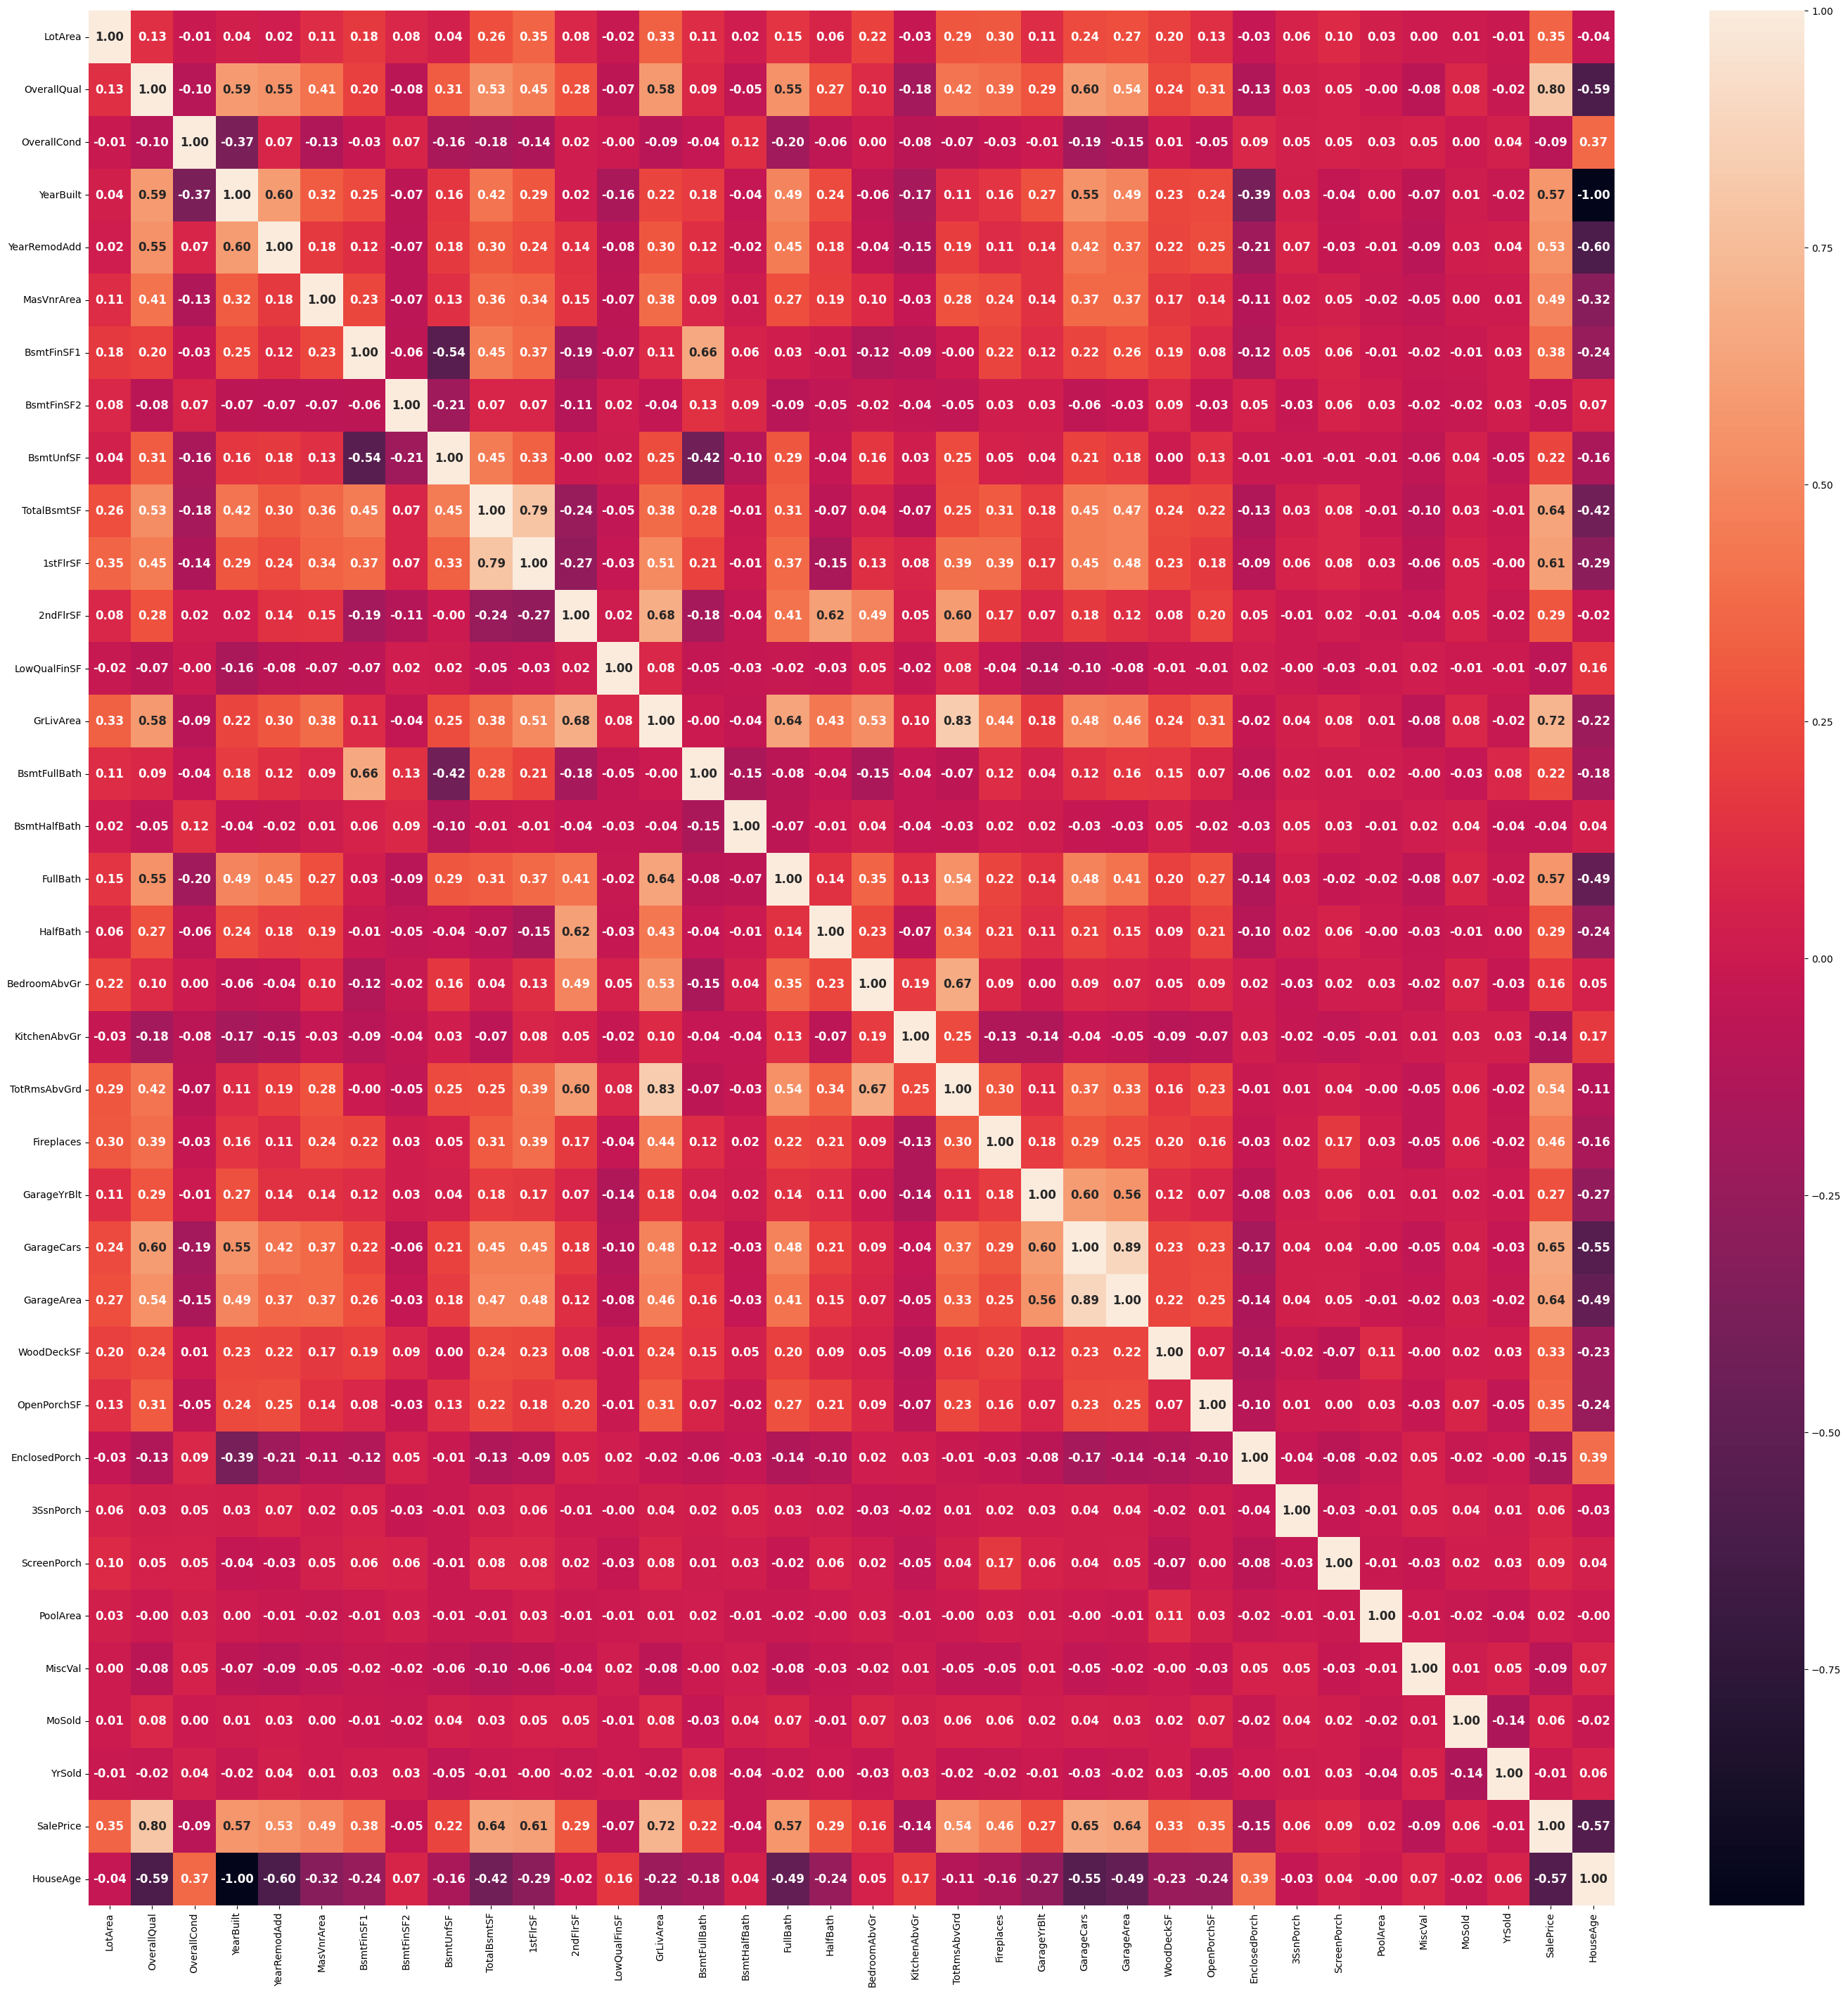

In [ ]:
fig, ax = plt.subplots(figsize=(35, 35))

sns.heatmap(
    data_correlation[numerical_correlation].corr(),
    annot=True,
    fmt=".2f",
    annot_kws={"weight": "bold", "size": 12},
    ax=ax
)

In [ ]:
list_of_correlation = data_correlation[numerical_correlation].corr()
list_of_correlation

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
LotArea        1.000000     0.126867    -0.008910   0.037056      0.021823   
OverallQual    0.126867     1.000000    -0.098734   0.593434      0.552857   
OverallCond   -0.008910    -0.098734     1.000000  -0.366753      0.071858   
YearBuilt      0.037056     0.593434    -0.366753   1.000000      0.601123   
YearRemodAdd   0.021823     0.552857     0.071858   0.601123      1.000000   
MasVnrArea     0.110666     0.408288    -0.128516   0.317091      0.175804   
BsmtFinSF1     0.175114     0.200044    -0.026487   0.246549      0.122745   
BsmtFinSF2     0.084034    -0.084456     0.067415  -0.065969     -0.074430   
BsmtUnfSF      0.039671     0.313057    -0.155803   0.161221      0.179354   
TotalBsmtSF    0.261858     0.527561    -0.175195   0.416279      0.301195   
1stFlrSF       0.349681     0.453011    -0.142885   0.292000      0.242715   
2ndFlrSF       0.082530     0.278286     0.018131   0.021033      0.135522   
LowQualFinSF  -0.017190    -0.067475    -0.001044  -0.160266     -0.079746   
GrLivArea      0.334963     0.581307    -0.091765   0.223968      0.295443   
BsmtFullBath   0.112432     0.091991    -0.036756   0.181183      0.121272   
BsmtHalfBath   0.021576    -0.050742     0.123932  -0.037081     -0.016789   
FullBath       0.150731     0.549562    -0.199661   0.485393      0.446284   
HalfBath       0.063173     0.269176    -0.057846   0.244309      0.184821   
BedroomAbvGr   0.215402     0.102977     0.003866  -0.056075     -0.042762   
KitchenAbvGr  -0.027953    -0.182696    -0.084981  -0.171991     -0.147696   
TotRmsAbvGrd   0.292603     0.418984    -0.067829   0.107371      0.190971   
Fireplaces     0.301420     0.388361    -0.027602   0.156405      0.107202   
GarageYrBlt    0.113594     0.288703    -0.005244   0.266616      0.139595   
GarageCars     0.243286     0.596148    -0.187968   0.549738      0.420197   
GarageArea     0.265962     0.544957    -0.153754   0.490984      0.367476   
WoodDeckSF     0.203377     0.241801     0.006653   0.233686      0.220828   
OpenPorchSF    0.130535     0.311253    -0.054361   0.239121      0.254519   
EnclosedPorch -0.030770    -0.128913     0.085934  -0.390305     -0.208371   
3SsnPorch      0.058878     0.032992     0.045713   0.033092      0.065513   
ScreenPorch    0.096704     0.048520     0.051730  -0.040891     -0.028092   
PoolArea       0.032716    -0.002107     0.033212   0.000979     -0.010156   
MiscVal        0.004659    -0.084406     0.053760  -0.069126     -0.086885   
MoSold         0.005076     0.080104     0.000360   0.010321      0.026838   
YrSold        -0.009574    -0.020490     0.041663  -0.016893      0.037566   
SalePrice      0.347958     0.797836    -0.090291   0.568557      0.533973   
HouseAge      -0.037414    -0.593319     0.367960  -0.999029     -0.598437   

               MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
LotArea          0.110666    0.175114    0.084034   0.039671     0.261858   
OverallQual      0.408288    0.200044   -0.084456   0.313057     0.527561   
OverallCond     -0.128516   -0.026487    0.067415  -0.155803    -0.175195   
YearBuilt        0.317091    0.246549   -0.065969   0.161221     0.416279   
YearRemodAdd     0.175804    0.122745   -0.074430   0.179354     0.301195   
MasVnrArea       1.000000    0.230717   -0.073568   0.126742     0.358474   
BsmtFinSF1       0.230717    1.000000   -0.063012  -0.539544     0.446240   
BsmtFinSF2      -0.073568   -0.063012    1.000000  -0.212422     0.071549   
BsmtUnfSF        0.126742   -0.539544   -0.212422   1.000000     0.450428   
TotalBsmtSF      0.358474    0.446240    0.071549   0.450428     1.000000   
1stFlrSF         0.338949    0.370161    0.073628   0.333812     0.790844   
2ndFlrSF         0.145778   -0.186066   -0.109319  -0.000719    -0.239938   
LowQualFinSF    -0.067182   -0.071254    0.021075   0.015709    -0.050723   
GrLivArea        0.378202    0.107952   -0.039221  

/tmp/ipython-input-4112254114.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




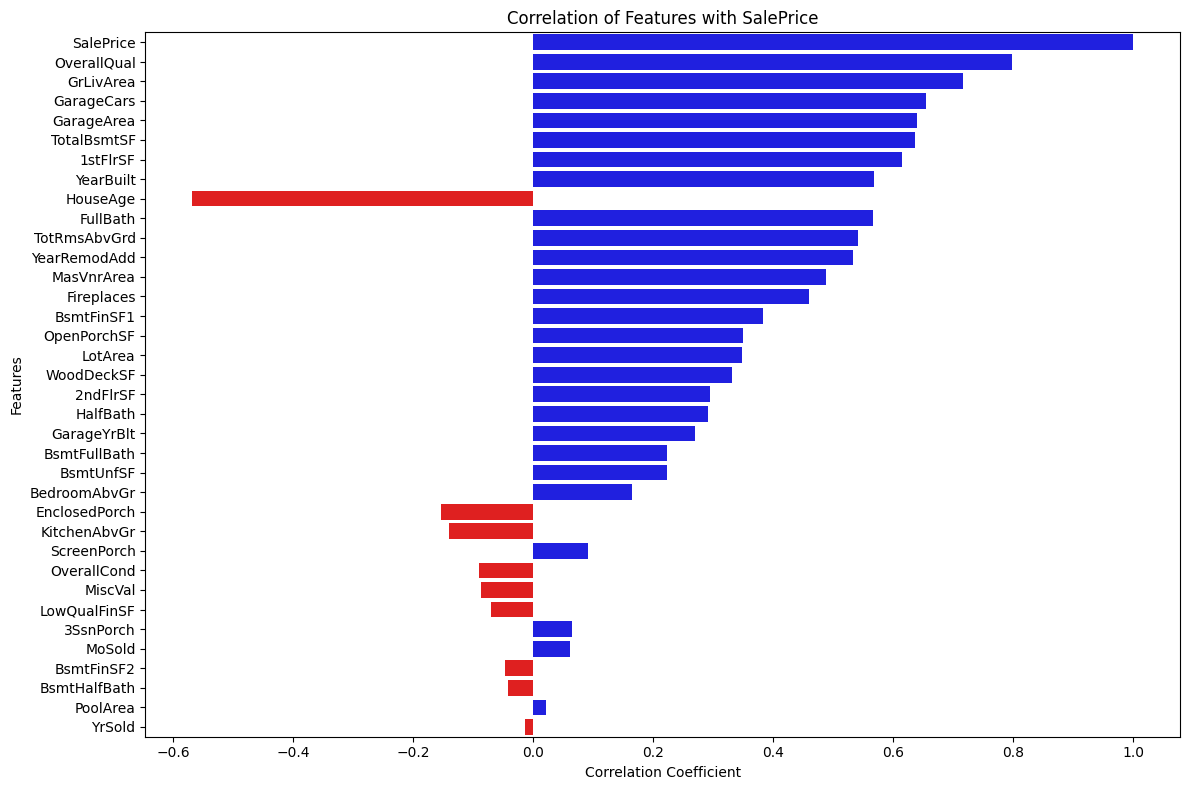

In [ ]:
sorted_corr = list_of_correlation["SalePrice"].sort_values(key=abs, ascending=False)

colors = ['blue' if v > 0 else 'red' for v in sorted_corr.values]

plt.figure(figsize=(12, 8))
sns.barplot(
    y=sorted_corr.index,
    x=sorted_corr.values,
    palette=colors
)
plt.title("Correlation of Features with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Then, we want to see if there's multicolinearity from each independet variable

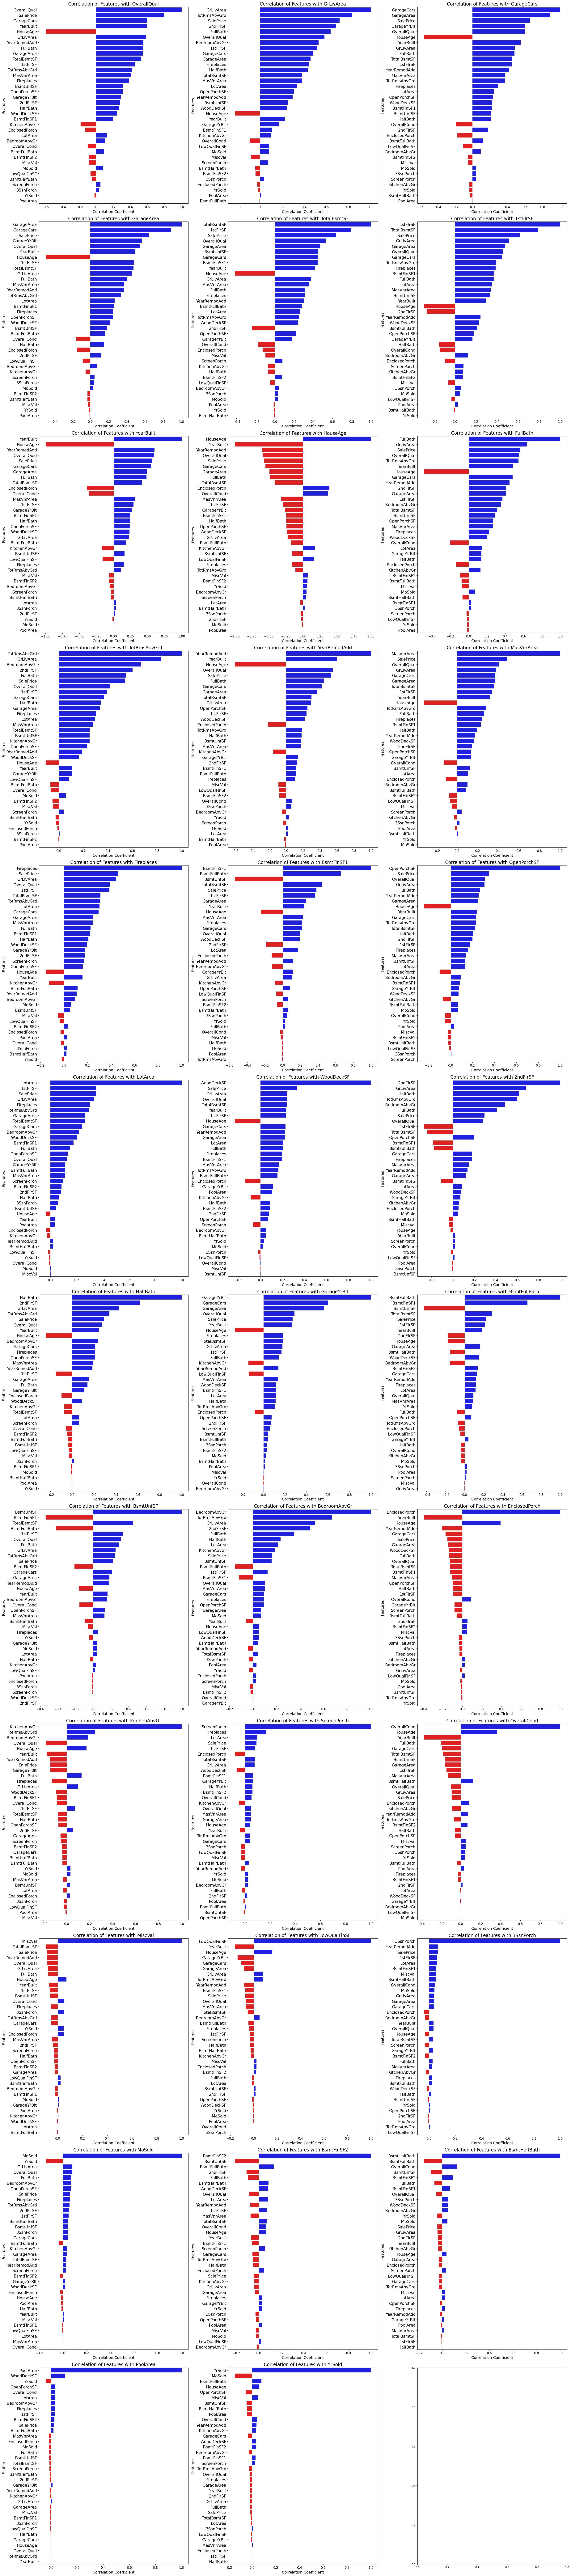

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=12, figsize=(30, 135))
plt.subplots_adjust(hspace=0.6)

ax = ax.flatten()

multicolinearity_corr = list(sorted_corr.index)
multicolinearity_corr.remove("SalePrice")

for idx, col in enumerate(multicolinearity_corr):
    corr = list_of_correlation[col].sort_values(key=abs, ascending=False)

    colors = ['blue' if val > 0 else 'red' for val in corr]

    sns.barplot(
        y=corr.index,
        x=corr.values,
        hue=corr.index,
        palette=colors,
        ax=ax[idx],
        legend=False
    )

    ax[idx].set_title(f"Correlation of Features with {col}", fontsize=17)
    ax[idx].set_xlabel("Correlation Coefficient", fontsize=14)
    ax[idx].set_ylabel("Features", fontsize=14)

    ax[idx].tick_params(axis='y', labelsize=15)
    ax[idx].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()


Then we're going to drop multicolinearity column

In [ ]:
corr_matrix = data[numerical_cols].drop(columns='SalePrice').corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

target_corr = data[numerical_cols].corr()['SalePrice'].abs()

to_drop = []

for col in upper.columns:
    for row in upper.index:
        if pd.notna(upper.loc[row, col]) and upper.loc[row, col] > 0.8:
            if target_corr[col] < target_corr[row]:
                to_drop.append(col)
            else:
                to_drop.append(row)

to_drop = list(set(to_drop))
to_drop

['TotRmsAbvGrd', 'GarageArea', 'HouseAge']

In [ ]:
data_correlation = data_correlation.drop(to_drop, axis=1)

#### Insight

- There's some variables that positively correlated to the dependent variabel which is GarageArea, GarageCars, Fireplaces, TotRmsAbvGrd,FullBath, GrLivArea, 1stFlrSf, TotalBsmtSF, YearBuilt, MasVnrArea,YearRemodAdd, YearBuild, and OverallQual.

- The Most Positive correlated variable : OverralQual (1st), GrLivArea(2nd)

- And the most negatively correlated to SalePrice is HouseAge
- Features like OverallQual, GrLivArea, and TotalBsmtSF are important to prioritize.

## 4. Feature Selection:
- Compare at least two feature selection techniques (Filter method, wrapper method, embedded method).
- Present the selected features from each method. Then, analyze the differences in the results of each method.
- Provide final feature recommendations for modeling needs, along with business and technical justifications 

For filter method we use this threshold (in absolute value):




| Correlation (abs) | Category     |
|----------------|--------------|
| 0.00 - 0.19     | Very Weak |
| 0.20 - 0.39     | Weak        |
| 0.40 - 0.59     | Moderate       |
| 0.60 - 0.79     | Strong         |
| 0.80 - 1.00     | Very Strong  |


In [ ]:
data_selection_feature = data_for_other_question.copy()
data_selection_feature.drop("Id",axis=1, inplace=True)

In [ ]:
data_selection_feature

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1453          20       RL    17217   Pave      Reg         Lvl    AllPub   
1454          20       FV     7500   Pave      Reg         Lvl    AllPub   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1453    Inside       Gtl      Mitchel       Norm       Norm     1Fam   
1454    Inside       Gtl      Somerst       Norm       Norm     1Fam   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1453     1Story            5            5       2006          2006     Gable   
1454     1Story            7            5       2004          2005     Gable   
1455     2Story            6            5       1999          2000     Gable   
1456     1Story            6            6       1978          1988     Gable   
1458     1Story            5            6       1950          1996       Hip   

     RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd       196.0        Gd        TA   
1     CompShg     MetalSd     MetalSd         0.0        TA        TA   
2     CompShg     VinylSd     VinylSd       162.0        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng         0.0        TA        TA   
4     CompShg     VinylSd     VinylSd       350.0        Gd        TA   
...       ...         ...         ...         ...       ...       ...   
1453  CompShg     VinylSd     VinylSd         0.0        TA        TA   
1454  CompShg     VinylSd     VinylSd         0.0        Gd        TA   
1455  CompShg     VinylSd     VinylSd         0.0        TA        TA   
1456  CompShg     Plywood     Plywood       119.0        TA        TA   
1458  CompShg     MetalSd     MetalSd         0.0        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil       TA       Gd           No          ALQ         216   
4         PConc

We're going to list numerical column which below Moderate

### Filtering

for numerical_column we use pearson correlation

In [ ]:
weak_column_filter = []
for col in numerical_cols:
    corr_number = data_selection_feature[col].corr(data_selection_feature["SalePrice"], method="pearson")
    if abs(corr_number) < 0.4:
        weak_column_filter.append(col)

In [ ]:
weak_column_filter

['LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

for categorical_column we use ANOVA F-Test

In [ ]:
print(categorical_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'HasGarage', 'HasBsmt']


In [ ]:
X = data_selection_feature[categorical_cols]
y = data_selection_feature['SalePrice']

In [ ]:
X_encoded = X.apply(LabelEncoder().fit_transform)


In [ ]:
f_values, p_values = f_regression(X_encoded, y)


In [ ]:
categorical_weak = 0
for feature, f_val, p_val in zip(X.columns, f_values, p_values):
    print(f"{feature} -> F-value: {f_val:.2f}, p-value: {p_val:.4f}")
    if p_val > 0.05:
       print(f"{feature}")
       categorical_weak += 1
       if feature not in weak_column_filter:
          weak_column_filter.append(feature)

MSZoning -> F-value: 55.46, p-value: 0.0000
Street -> F-value: 4.17, p-value: 0.0413
LotShape -> F-value: 93.76, p-value: 0.0000
LandContour -> F-value: 0.33, p-value: 0.5635
LandContour
Utilities -> F-value: 0.30, p-value: 0.5857
Utilities
LotConfig -> F-value: 3.63, p-value: 0.0570
LotConfig
LandSlope -> F-value: 1.47, p-value: 0.2250
LandSlope
Neighborhood -> F-value: 62.67, p-value: 0.0000
Condition1 -> F-value: 16.69, p-value: 0.0000
Condition2 -> F-value: 0.34, p-value: 0.5577
Condition2
BldgType -> F-value: 8.26, p-value: 0.0041
HouseStyle -> F-value: 50.27, p-value: 0.0000
RoofStyle -> F-value: 77.25, p-value: 0.0000
RoofMatl -> F-value: 4.01, p-value: 0.0454
Exterior1st -> F-value: 19.20, p-value: 0.0000
Exterior2nd -> F-value: 23.46, p-value: 0.0000
ExterQual -> F-value: 1058.26, p-value: 0.0000
ExterCond -> F-value: 29.25, p-value: 0.0000
Foundation -> F-value: 282.07, p-value: 0.0000
BsmtQual -> F-value: 830.38, p-value: 0.0000
BsmtCond -> F-value: 14.58, p-value: 0.0001
Bs

In [ ]:
categorical_weak

5

In [ ]:
weak_column_filter

['LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition2']

### Wrapper Method

In [ ]:
X_wrapper = data_selection_feature.drop(columns='SalePrice')
y_wrapper = data_selection_feature['SalePrice']

X_encoded_wrapper = X_wrapper.apply(LabelEncoder().fit_transform)

model = RandomForestRegressor(random_state=42)

rfe = RFE(model)
rfe.fit(X_encoded_wrapper, y_wrapper)

RFE(estimator=RandomForestRegressor(random_state=42))

In [ ]:
selected_features = X_encoded_wrapper.columns[rfe.support_]
print("Chosen feature:", selected_features.tolist())

Fitur terpilih: ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'HouseAge']


In [ ]:
not_selected_features = X_encoded_wrapper.columns[~rfe.support_]
print("Not Chosen:", not_selected_features.tolist())

Not Chosen: ['Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'HeatingQC', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition', 'HasGarage', 'HasBsmt']


In [ ]:
weak_wrapper_filter = list(set(list(not_selected_features) + list(weak_column_filter)))

In [ ]:
weak_wrapper_filter

['YrSold',
 'WoodDeckSF',
 'HasBsmt',
 'ScreenPorch',
 'GarageQual',
 'LotConfig',
 'HouseStyle',
 'HalfBath',
 'PavedDrive',
 'EnclosedPorch',
 'MiscVal',
 'HeatingQC',
 'BldgType',
 'PoolArea',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'RoofMatl',
 'LotArea',
 'KitchenAbvGr',
 'LowQualFinSF',
 'Condition2',
 'Functional',
 'BsmtFinSF2',
 '3SsnPorch',
 'GarageYrBlt',
 'BsmtCond',
 'Heating',
 'LandContour',
 'Condition1',
 'GarageFinish',
 'BsmtFinType2',
 'GarageCond',
 'RoofStyle',
 'Electrical',
 'HasGarage',
 'Foundation',
 'SaleType',
 'SaleCondition',
 'Utilities',
 'ExterCond',
 'OverallCond',
 '2ndFlrSF',
 'LandSlope',
 'BsmtFullBath',
 'BsmtFinSF1',
 'BsmtHalfBath',
 'OpenPorchSF',
 'Street',
 'MoSold']

that is the combine column that not chosen by those 2 technique

In [ ]:
len(weak_wrapper_filter)

49

In [ ]:
len(data_selection_feature.columns)

76

or maybe we can determined weak column by the list on 2 method-weak column

In [ ]:
both_weak_column = [col for col in weak_column_filter + list(not_selected_features) if col  in weak_column_filter and col in list(not_selected_features)]

In [ ]:
both_weak_column

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition2',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition2',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [ ]:
len(both_weak_column)

32

My decision is to drop the columns that appear in both weak column methods, because it results in fewer columns being dropped

In [ ]:
data_selection_feature.drop(both_weak_column, axis=1, inplace=True)

In [ ]:
data_selection_feature.head()

MSSubClass MSZoning  LotArea Street LotShape Neighborhood Condition1  \
0          60       RL     8450   Pave      Reg      CollgCr       Norm   
1          20       RL     9600   Pave      Reg      Veenker      Feedr   
2          60       RL    11250   Pave      IR1      CollgCr       Norm   
3          70       RL     9550   Pave      IR1      Crawfor       Norm   
4          60       RL    14260   Pave      IR1      NoRidge       Norm   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
0     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA   
1     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA   
2     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA   
3     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA   
4     Gable  CompShg     VinylSd     VinylSd       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf        150          856    GasA        Ex          Y   
1          Unf        284         1262    GasA        Ex          Y   
2          Unf        434          920    GasA        Ex          Y   
3          Unf        540          756    GasA        Gd          Y   
4          Unf        490         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  BedroomAbvGr  \
0      SBrkr       856       854       1710         2             3   
1      SBrkr      1262         0       1262         2             3   
2      SBrkr       920       866       1786         2             3   
3      SBrkr       961       756       1717         1             3   
4      SBrkr      1145      1053       2198         2             4   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   
4          Gd             9        Typ           1     Attchd       2000.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         548         TA         TA          Y   
1          RFn           2         460         TA         TA          Y   
2          RFn           2         608         TA         TA          Y   
3          Unf           3         642         TA         TA          Y   
4          RFn           3         836         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  MoSold  YrSold SaleType SaleCondition  SalePrice  \
0           0           61       2    2008       WD        Normal     208500   
1         298            0       5    2007       WD        Normal     181500   
2           0           42       9    2008       WD        Normal     223500   
3           0           35       2    2006       WD       Abnorml     140000   
4      